<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sales_csv_path = './sat_scores.csv'
import csv
sat_data = []
with open(sales_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_data.append(row)
f.close()
sat_data

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [3]:
header = sat_data[0]
header

['State', 'Rate', 'Verbal', 'Math']

In [4]:
# float the data(index 1-3)
data=sat_data[1:]
clean_data = []
for row in data:
        clean_data.append([row[0]]+[float(e) for e in row[1:]])
        
clean_data

[['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0],
 ['NH', 72.0, 520.0, 516.0],
 ['RI', 71.0, 501.0, 499.0],
 ['PA', 71.0, 500.0, 499.0],
 ['VT', 69.0, 511.0, 506.0],
 ['ME', 69.0, 506.0, 500.0],
 ['VA', 68.0, 510.0, 501.0],
 ['DE', 67.0, 501.0, 499.0],
 ['MD', 65.0, 508.0, 510.0],
 ['NC', 65.0, 493.0, 499.0],
 ['GA', 63.0, 491.0, 489.0],
 ['IN', 60.0, 499.0, 501.0],
 ['SC', 57.0, 486.0, 488.0],
 ['DC', 56.0, 482.0, 474.0],
 ['OR', 55.0, 526.0, 526.0],
 ['FL', 54.0, 498.0, 499.0],
 ['WA', 53.0, 527.0, 527.0],
 ['TX', 53.0, 493.0, 499.0],
 ['HI', 52.0, 485.0, 515.0],
 ['AK', 51.0, 514.0, 510.0],
 ['CA', 51.0, 498.0, 517.0],
 ['AZ', 34.0, 523.0, 525.0],
 ['NV', 33.0, 509.0, 515.0],
 ['CO', 31.0, 539.0, 542.0],
 ['OH', 26.0, 534.0, 439.0],
 ['MT', 23.0, 539.0, 539.0],
 ['WV', 18.0, 527.0, 512.0],
 ['ID', 17.0, 543.0, 542.0],
 ['TN', 13.0, 562.0, 553.0],
 ['NM', 13.0, 551.0, 542.0],
 ['IL', 12.0, 576.0, 589.0],
 ['KY', 12.0, 

In [5]:
sat_dict = {key_name:[row[index] for row in clean_data] for index, key_name in enumerate(header)}
sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
df1 = pd.DataFrame(sat_dict)
df1.dtypes

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [7]:
df2 = pd.read_csv(sales_csv_path)
df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

Pandas have a default mapping to map data types, while inputting from a dictionary requires you to convert the columns to float, else will recognise as objects.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df2.head(10)
# shows the passing rate, average score of verbal tests and average score for math tests for each state.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dict  = {}

data_dict['variables'] = list(df2.columns)
data_dict['types'] = ['Object', 'Integer', 'Integer', 'Integer']
data_dict['description'] = ['States', 'Passing rate', 'Average verbal score', 'Average math Score']
data_dict['shape'] = df2.shape

data_dict

{'variables': ['State', 'Rate', 'Verbal', 'Math'],
 'types': ['Object', 'Integer', 'Integer', 'Integer'],
 'description': ['States',
  'Passing rate',
  'Average verbal score',
  'Average math Score'],
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


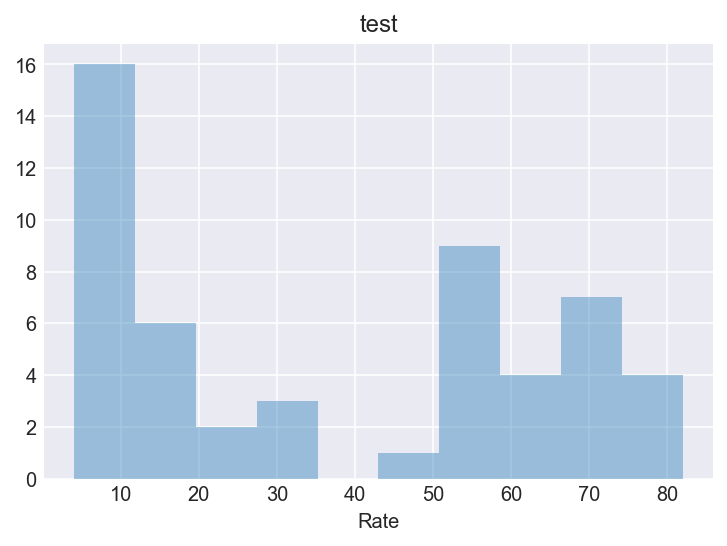

In [10]:
sns.set_style('darkgrid')
rate = pd.Series(df2['Rate'], name="Rate")
ax = sns.distplot(rate, kde=False, bins=10).set_title('test')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


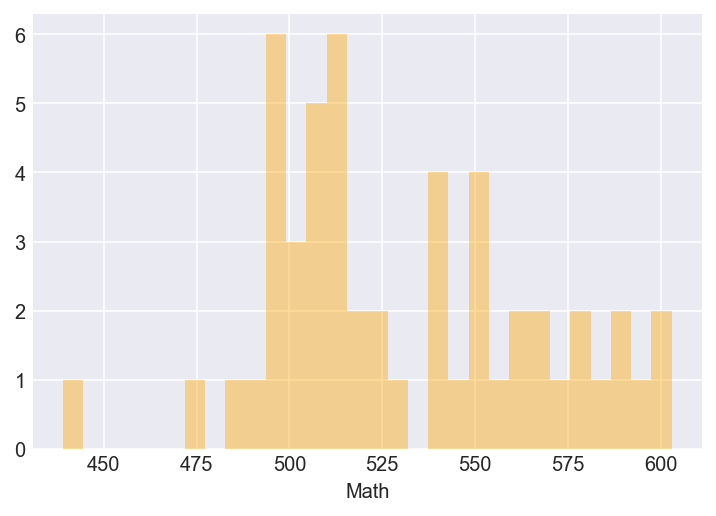

In [11]:
math = pd.Series(df2['Math'], name="Math")
ax = sns.distplot(math, kde=False, bins=30, color='orange')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


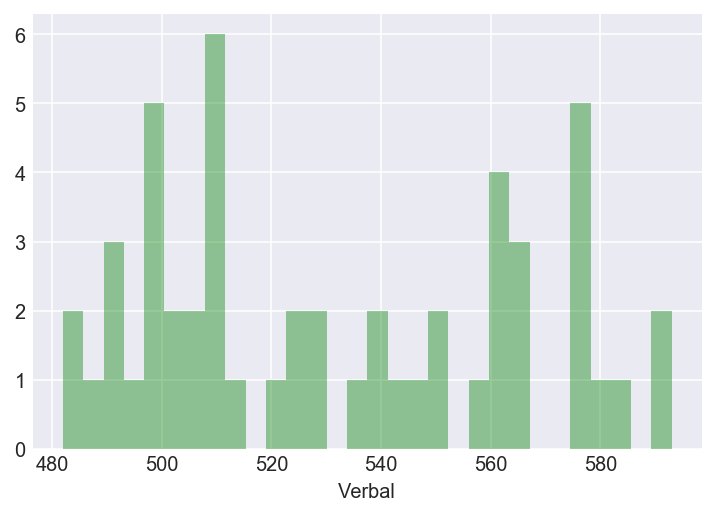

In [12]:
verbal = pd.Series(df2['Verbal'], name="Verbal")
ax = sns.distplot(verbal, kde=False, bins=30, color='green')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

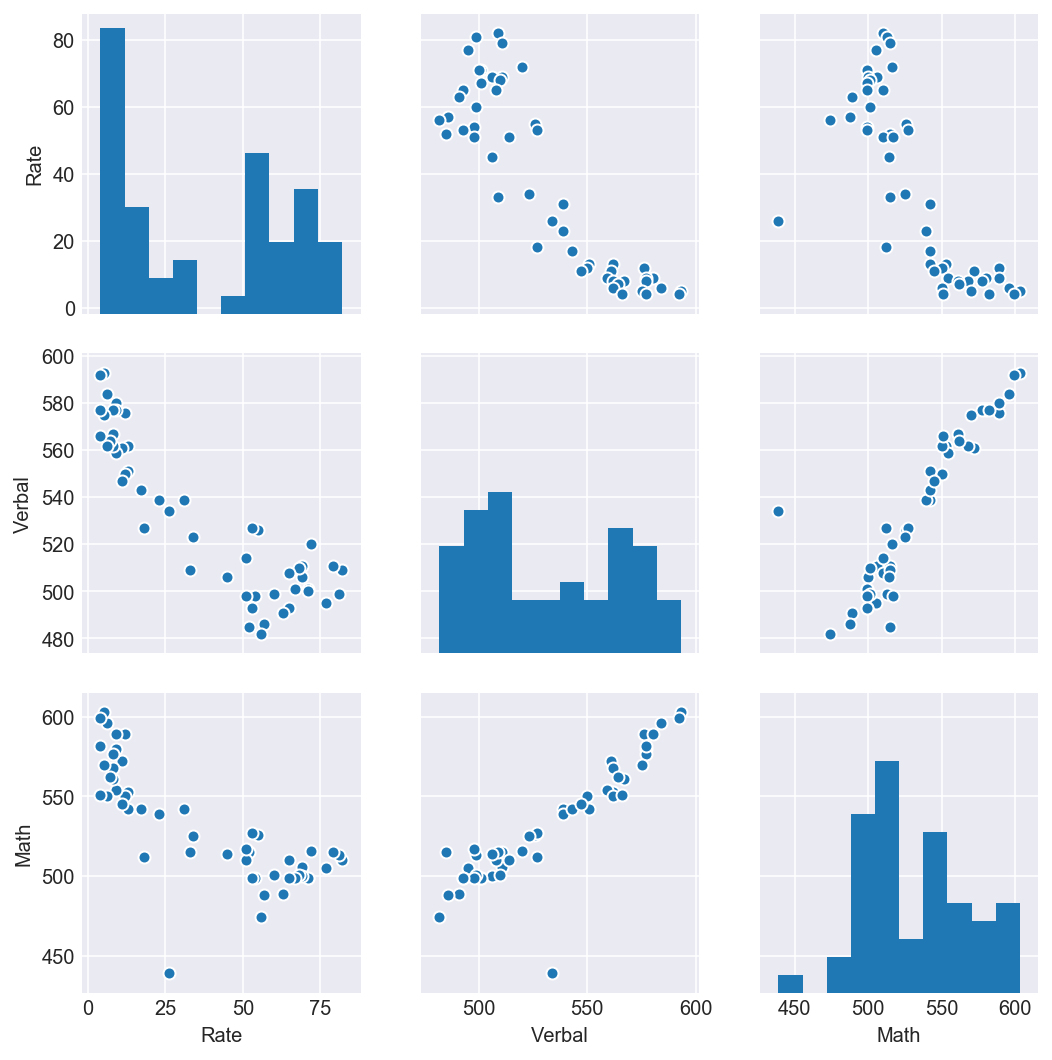

In [13]:
sns.pairplot(df2)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,'Verbal and Math scores')

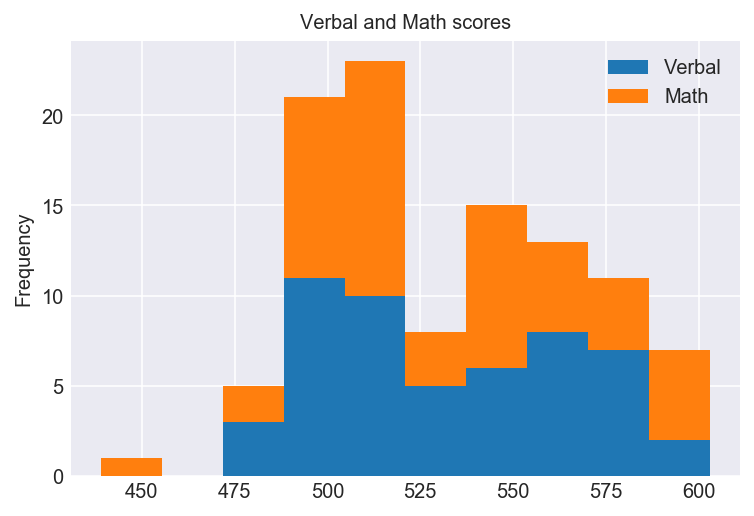

In [14]:
df2[['Verbal', 'Math']].plot(kind='hist', stacked=True).set_title("Verbal and Math scores", fontsize=10)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

ANS: A boxplot clearly shows the quartiles of the distribution, and shows the outliers of the population.
While a scatterplot is useful for showing the correlation, and a histogram is useful for plotting the distribution.

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

ANS: Math and Verbal are scores that are in absolute values, while Rate is a relative value. (percentage)

Text(0.5,1,'Verbal and Math scores')

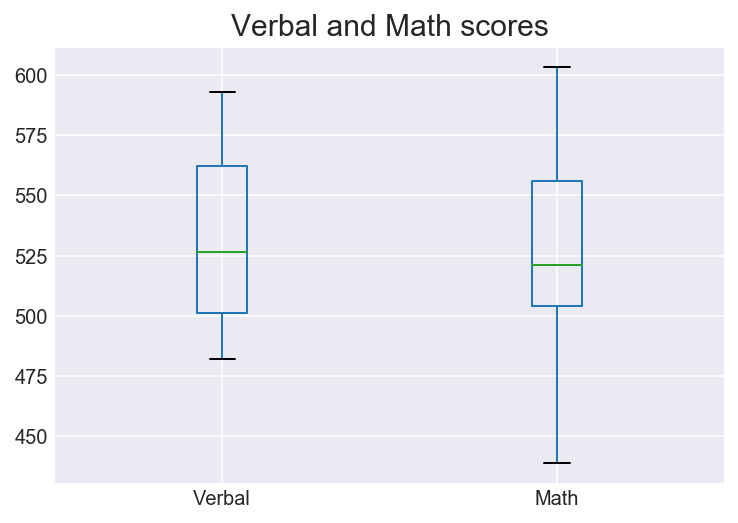

In [15]:
df2[['Verbal', 'Math']].plot(kind='box', stacked=True).set_title("Verbal and Math scores", fontsize = 15)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0.5,1,'Rate,Verbal and Math scores')

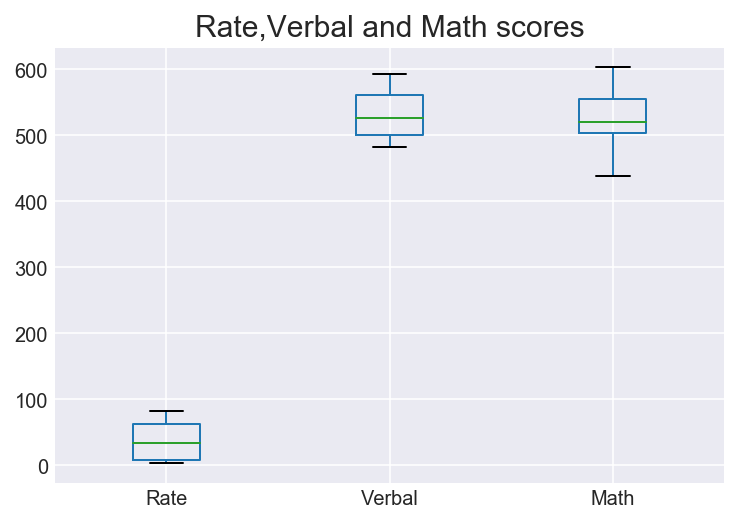

In [16]:
df2.plot(kind='box', stacked=True).set_title("Rate,Verbal and Math scores", fontsize = 15)

We can use a preprocessing tool from sklearn to scale the graphs.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
above_average = df2[df2['Verbal'] > np.mean(df2['Verbal'])]
above_average['State'].tolist()
# 24 above 

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [18]:
print("There are " + str(len(above_average)) + " states with a score higher than the mean of " + str(np.mean(df2['Verbal'])))

There are 24 states with a score higher than the mean of 532.0192307692307


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
above_median = df2[df2['Verbal'] > np.median(df2['Verbal'])]
above_median['State'].tolist()

# means... median lower than mean. why? idk.. there are more above median than above mean. so??????


['WA',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [20]:
print("There are " + str(len(above_median)) + " states with a score higher than the median of " + str(np.median(df2['Verbal'])))

There are 26 states with a score higher than the median of 526.5


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
df2['Verbal - Math'] = df2['Verbal']- df2['Math']
df2.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
# assume that qns wants to exclude rows that difference = 0
Verbal_higher = df2[df2['Verbal - Math'] > 0]
Verbal_higher.sort_values('Verbal - Math', ascending=False).head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [23]:
# assume that qns wants to exclude rows that difference = 0, assuming to show greatest gap
Math_higher = df2[df2['Verbal - Math'] < 0]
Math_higher.sort_values('Verbal - Math', ascending=True).head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
df2.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


Positive correlation:
Verbal and math have a strong positive correlation

Negative correlation:
Verbal and rate have a stronger negative correlation as compared to math and rate

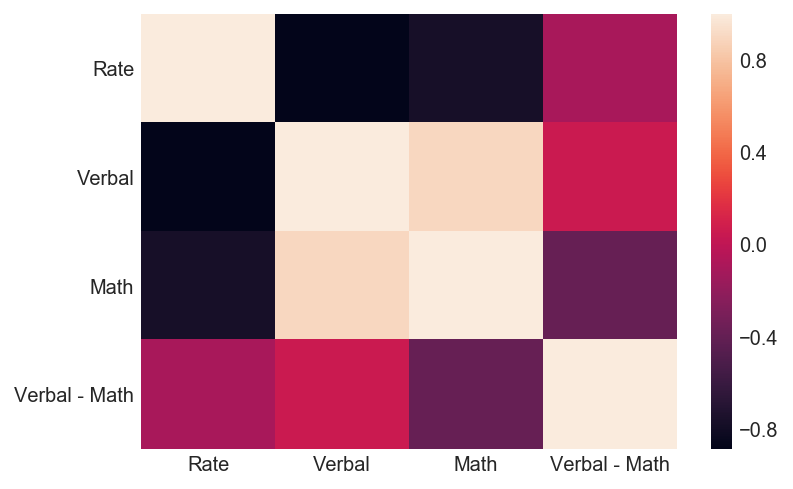

In [25]:
# plot heatmap to doublecheck
sns.heatmap(df2.corr())

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
df2.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Row Indications
count: number of rows in the data set 

mean: mean of the column 

std: standard deviation of the column 

min: minimum value of the column 

25%: 25% quantile 

50%: the median 

75% 75% quantile 

max: maximum value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [27]:
df2.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


### Correlation vs Covariance
Correlation is when the change in one item may result in the change in the another item. On the other hand, covariance is when two items vary together. Both covariance and correlation indicate whether variables are positively or inversely related. Correlation also tells you the degree to which the variables tend to move together.



#### $$ Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$


Covariance values are more difficult to read because they are relative to the variance of the variables, which require certain level of interpretation.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [28]:
drug_df = pd.read_csv('drug-use-by-age.csv')
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [29]:
# checking for null values
drug_df.isnull().any()

age                        False
n                          False
alcohol-use                False
alcohol-frequency          False
marijuana-use              False
marijuana-frequency        False
cocaine-use                False
cocaine-frequency          False
crack-use                  False
crack-frequency            False
heroin-use                 False
heroin-frequency           False
hallucinogen-use           False
hallucinogen-frequency     False
inhalant-use               False
inhalant-frequency         False
pain-releiver-use          False
pain-releiver-frequency    False
oxycontin-use              False
oxycontin-frequency        False
tranquilizer-use           False
tranquilizer-frequency     False
stimulant-use              False
stimulant-frequency        False
meth-use                   False
meth-frequency             False
sedative-use               False
sedative-frequency         False
dtype: bool

In [30]:
# checking types
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [31]:
# From checking the types, it seems that there are some columns that require cleaning. 
# eg. frequency columns should be of float type. 
# Perhaps there are some characters in the cell that are affecting the type.

In [32]:
drug_df.shape

(17, 28)

In [33]:
drug_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

#### Cleaning the data 

In [34]:
# find the dirty data
np.unique(drug_df[['meth-frequency','oxycontin-frequency', 'inhalant-frequency', 'heroin-frequency', 'crack-frequency', 'cocaine-frequency']])

array(['-', '1.0', '10.0', '10.5', '104.0', '105.0', '12.0', '120.0',
       '13.5', '15.0', '17.0', '17.5', '180.0', '19.0', '2.0', '20.0',
       '21.0', '24.0', '24.5', '280.0', '3.0', '3.5', '30.0', '35.5',
       '36.0', '4.0', '4.5', '41.0', '45.0', '46.0', '48.0', '5.0', '5.5',
       '50.0', '54.0', '57.5', '6.0', '62.0', '64.0', '66.0', '66.5',
       '7.0', '7.5', '8.0', '88.0', '9.5'], dtype=object)

In [35]:
#write loop?

# replace '-' with 0 and float columns
drug_df['meth-frequency'] = (drug_df['meth-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)
drug_df['oxycontin-frequency'] = (drug_df['oxycontin-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)
drug_df['inhalant-frequency'] = (drug_df['inhalant-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)
drug_df['heroin-frequency'] = (drug_df['heroin-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)
drug_df['crack-frequency'] = (drug_df['crack-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)
drug_df['cocaine-frequency'] = (drug_df['cocaine-frequency'].map(lambda x: x.replace('-', '0.0'))).astype(float)


In [36]:
# age range causing it to be object, to leave first
np.unique(drug_df['age'])

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [37]:
# for purpose for analysis, to take average for age range and 65 for 65+
new = [x for x in drug_df['age']]
new

['12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22-23',
 '24-25',
 '26-29',
 '30-34',
 '35-49',
 '50-64',
 '65+']

In [38]:
ages = []
for x in drug_df['age']:
    if '-' in x:
        ages.append((float(x[:x.find('-')]) + float(x[x.find('-')+1:]))/2)
    elif '+' in x:
        ages.append(x[:x.find('+')])
    else:
        ages.append(x)
        
ages

['12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 22.5,
 24.5,
 27.5,
 32.0,
 42.0,
 57.0,
 '65']

In [39]:
#replace ages with values as per above, and round them to integers
drug_df['age'] = ages
drug_df['age'] = drug_df['age'].astype(int)

In [40]:
# checking to make sure they make sense
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null int64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyconti

In [41]:
drug_df.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.529412,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,15.362770,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,27.000000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


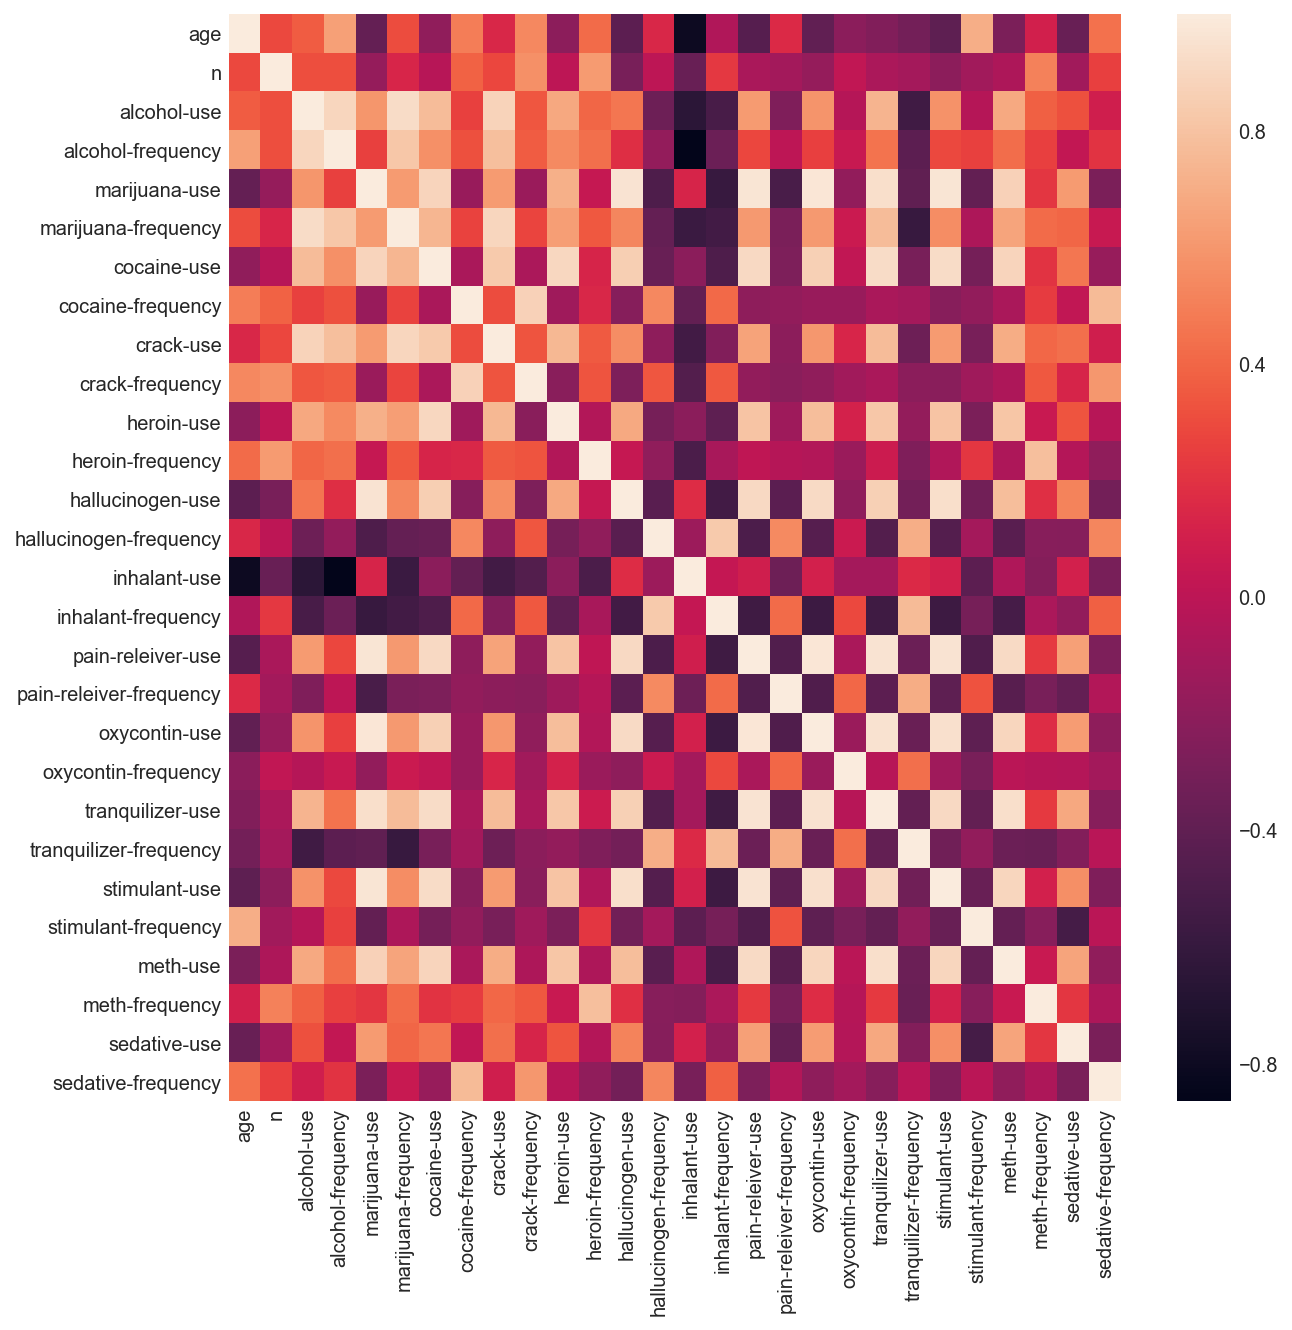

In [42]:
#find out which drugs have the strongest correlation
corr = drug_df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### Split usage and frequency for more meaningful analysis

#### Usage

In [43]:
usage_columns = [col for col in drug_df.columns if 'use' in col ]

usage_df = drug_df[usage_columns]

In [44]:
#add age group to df
usage_df.insert(0, 'age', ages)
usage_df

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [45]:
usage_df.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [46]:
usage_df.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


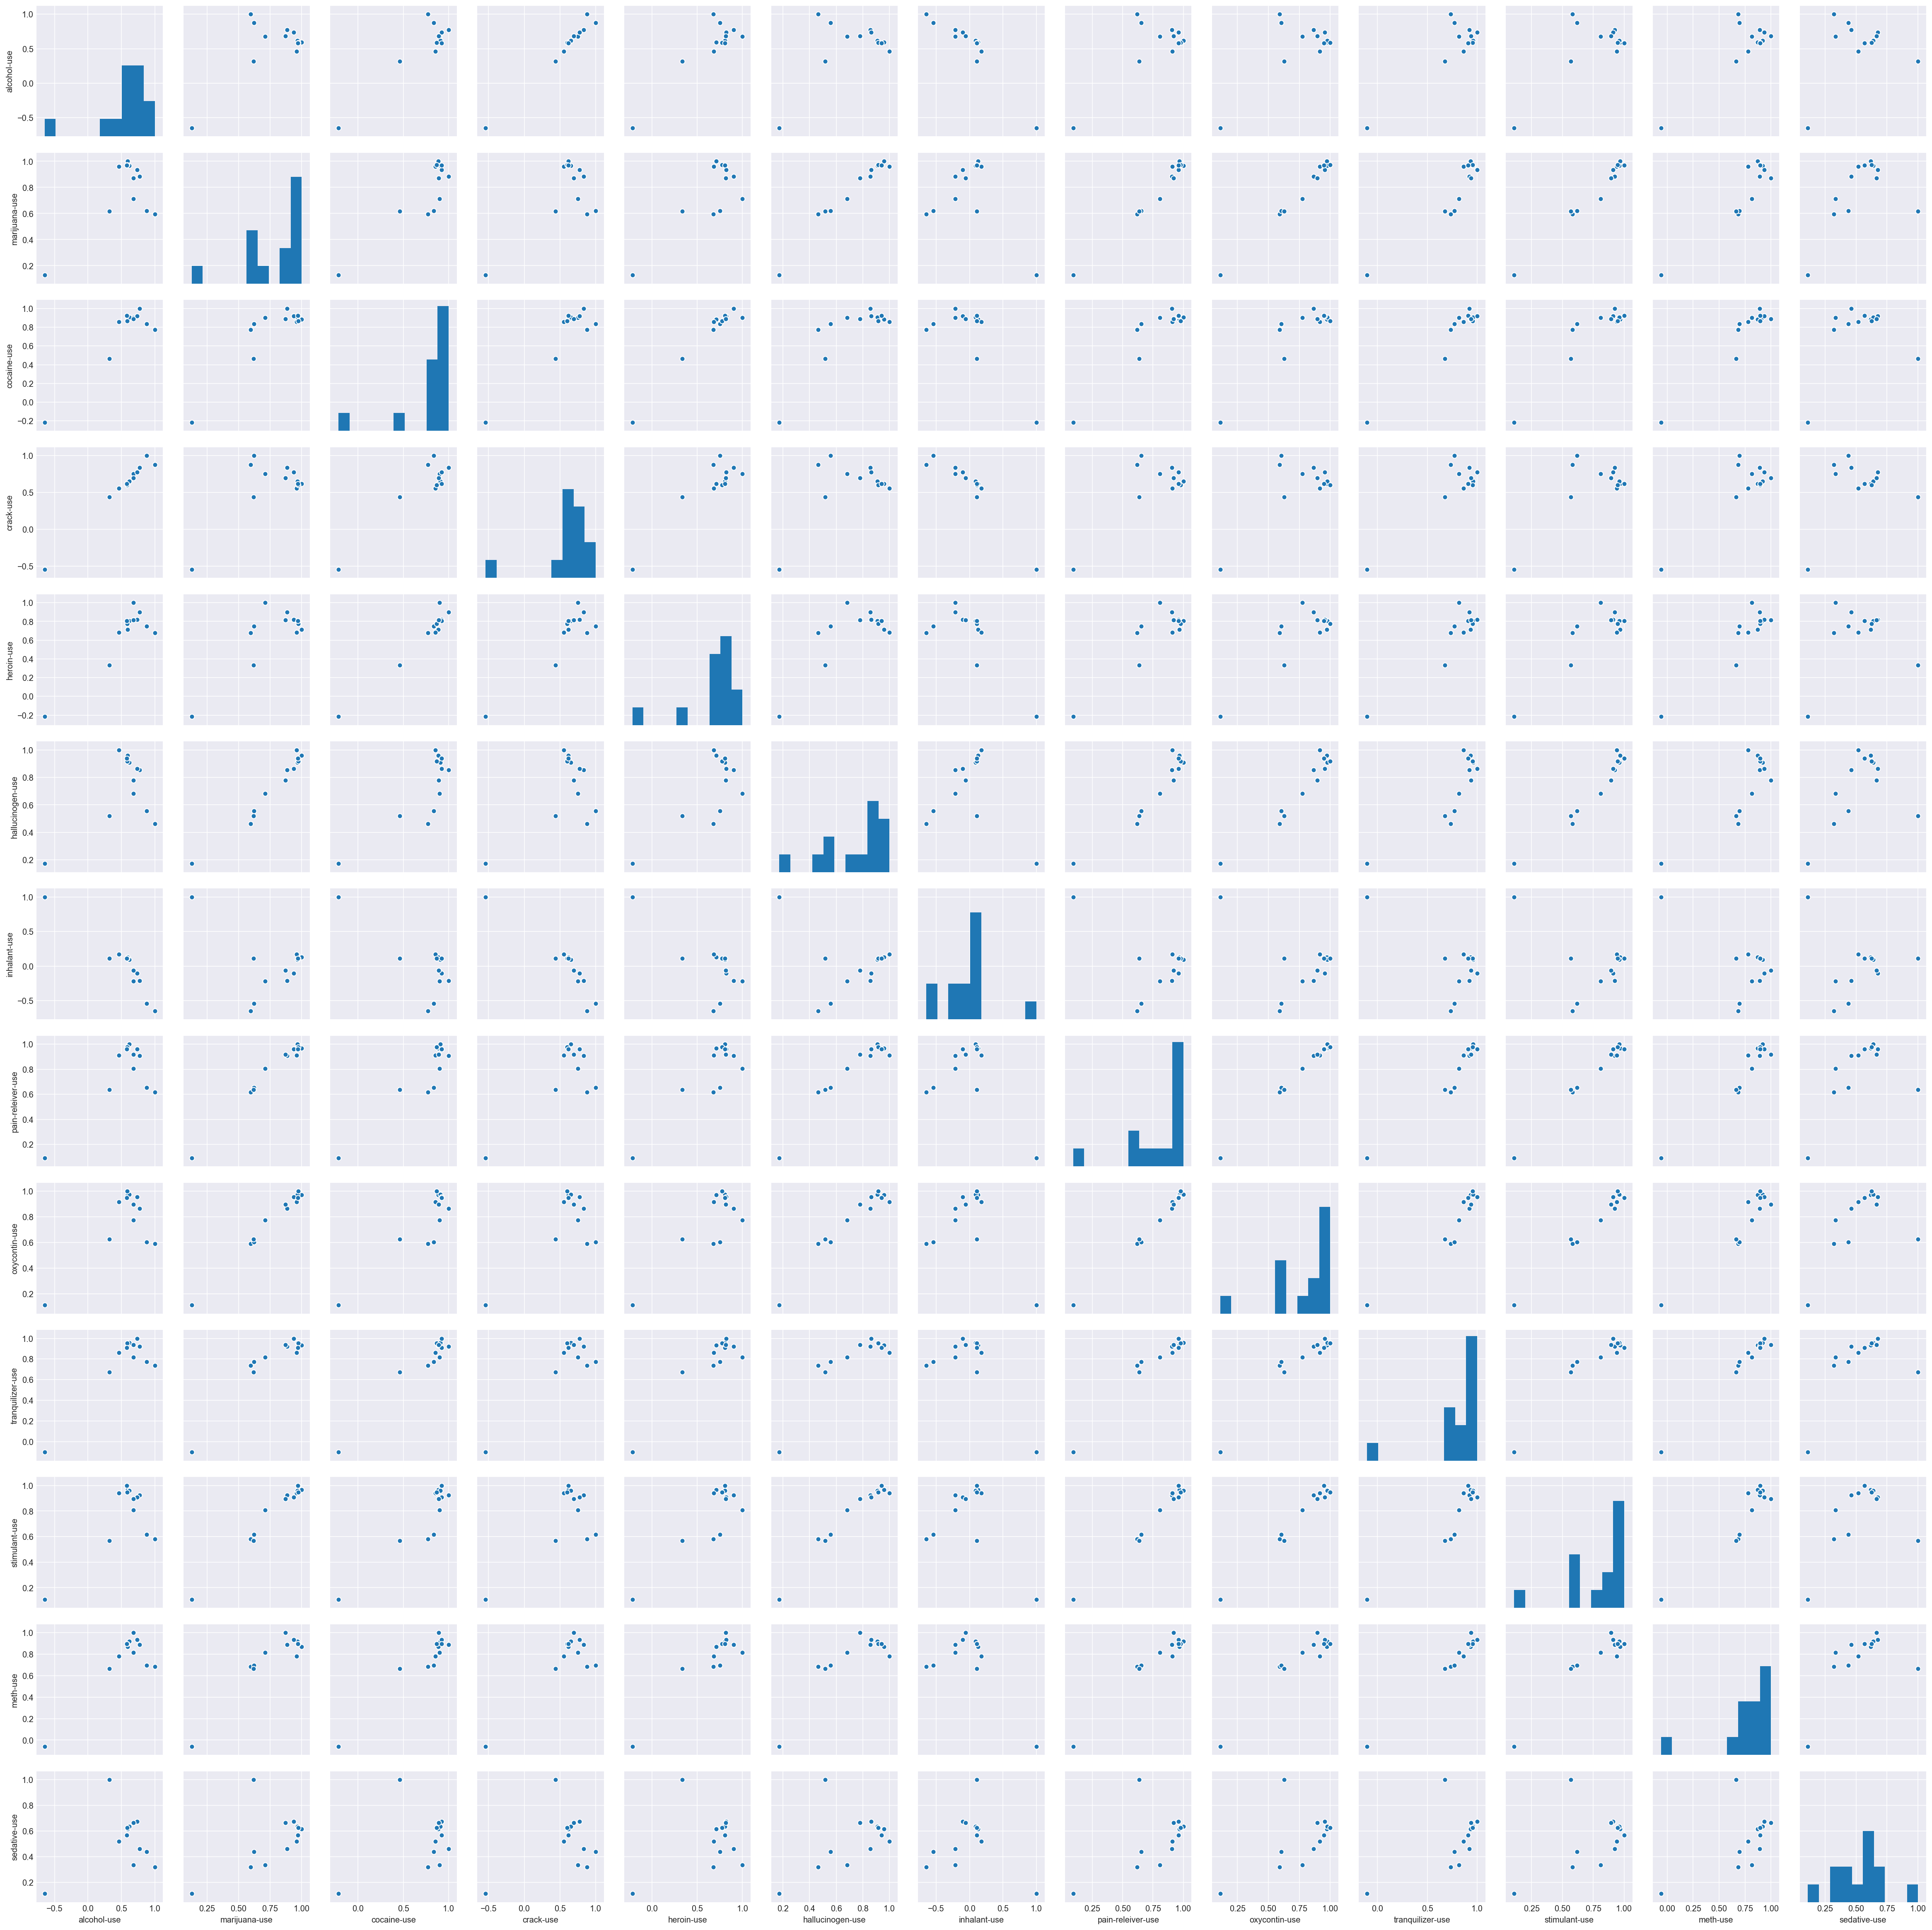

In [47]:
sns.pairplot(usage_df.corr())

Finding the highest usages by drug type

Text(0.5,1,'Usage by drug type')

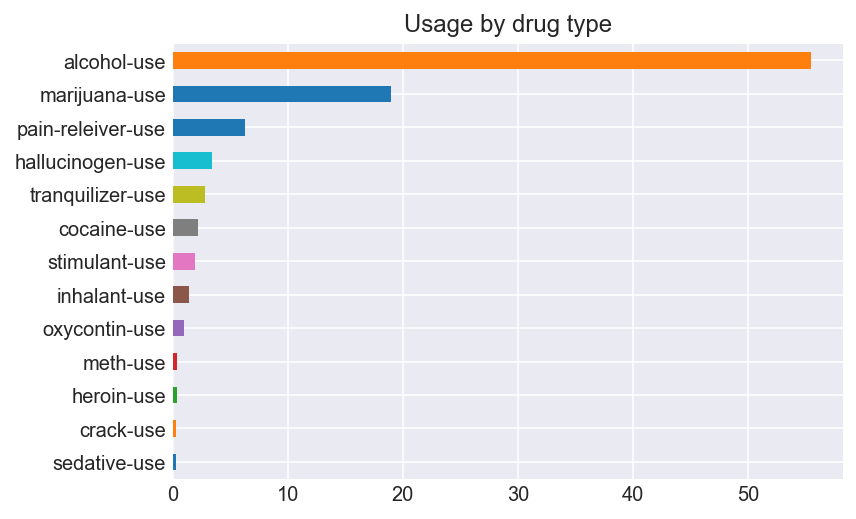

In [48]:
usage_df.mean().sort_values(ascending=True).plot(kind='barh').set_title('Usage by drug type')
# Top 3 - alcohol, marijuana, pain releiver

Find the usages by age group by drug type

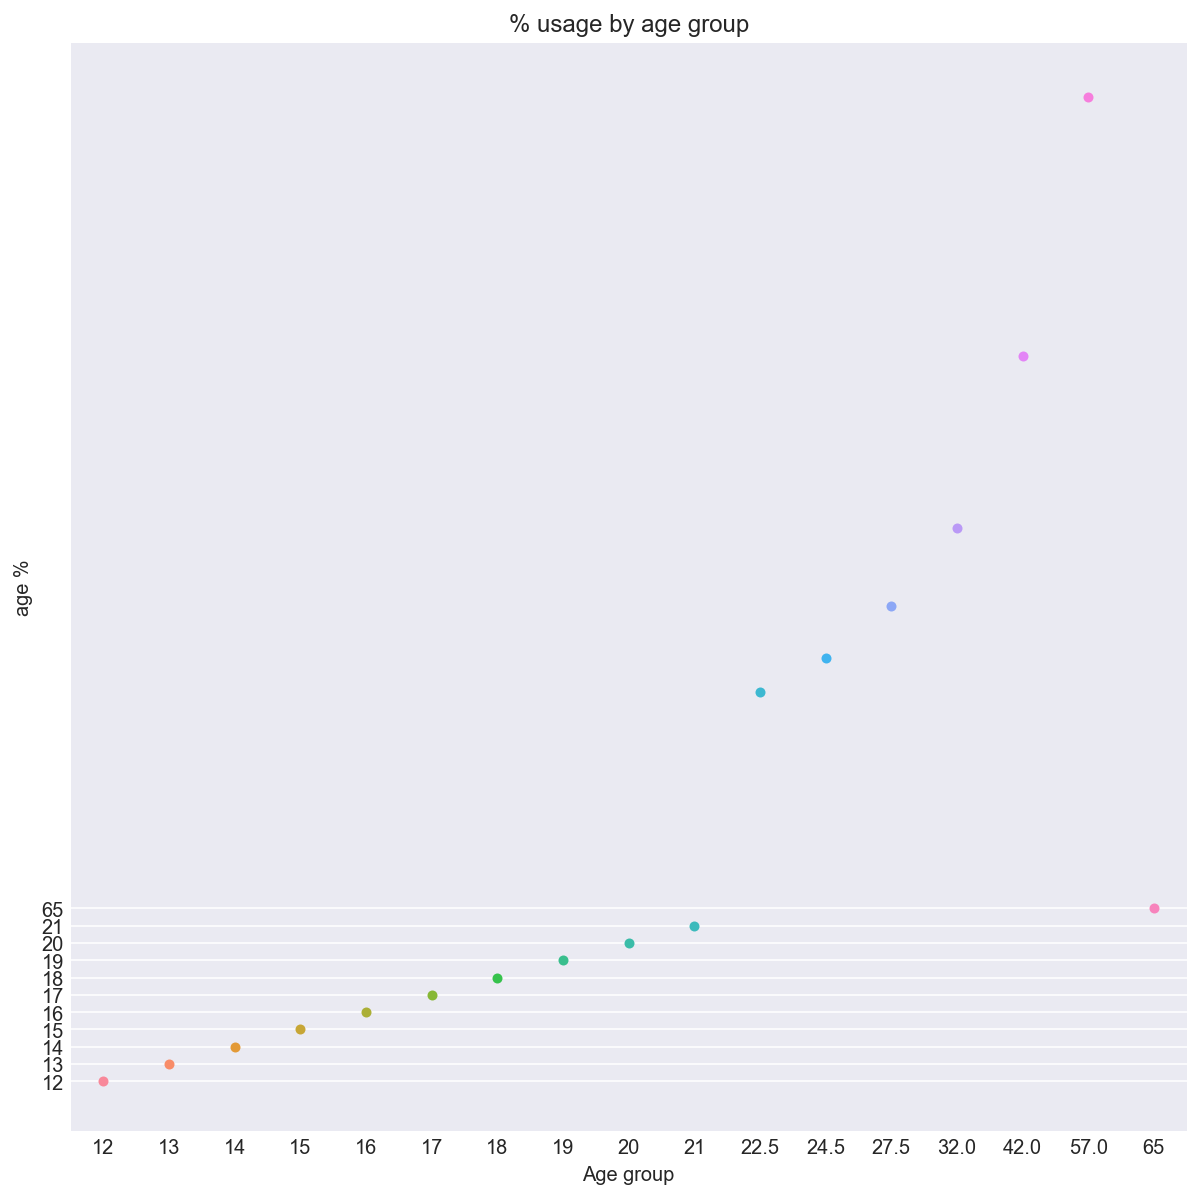

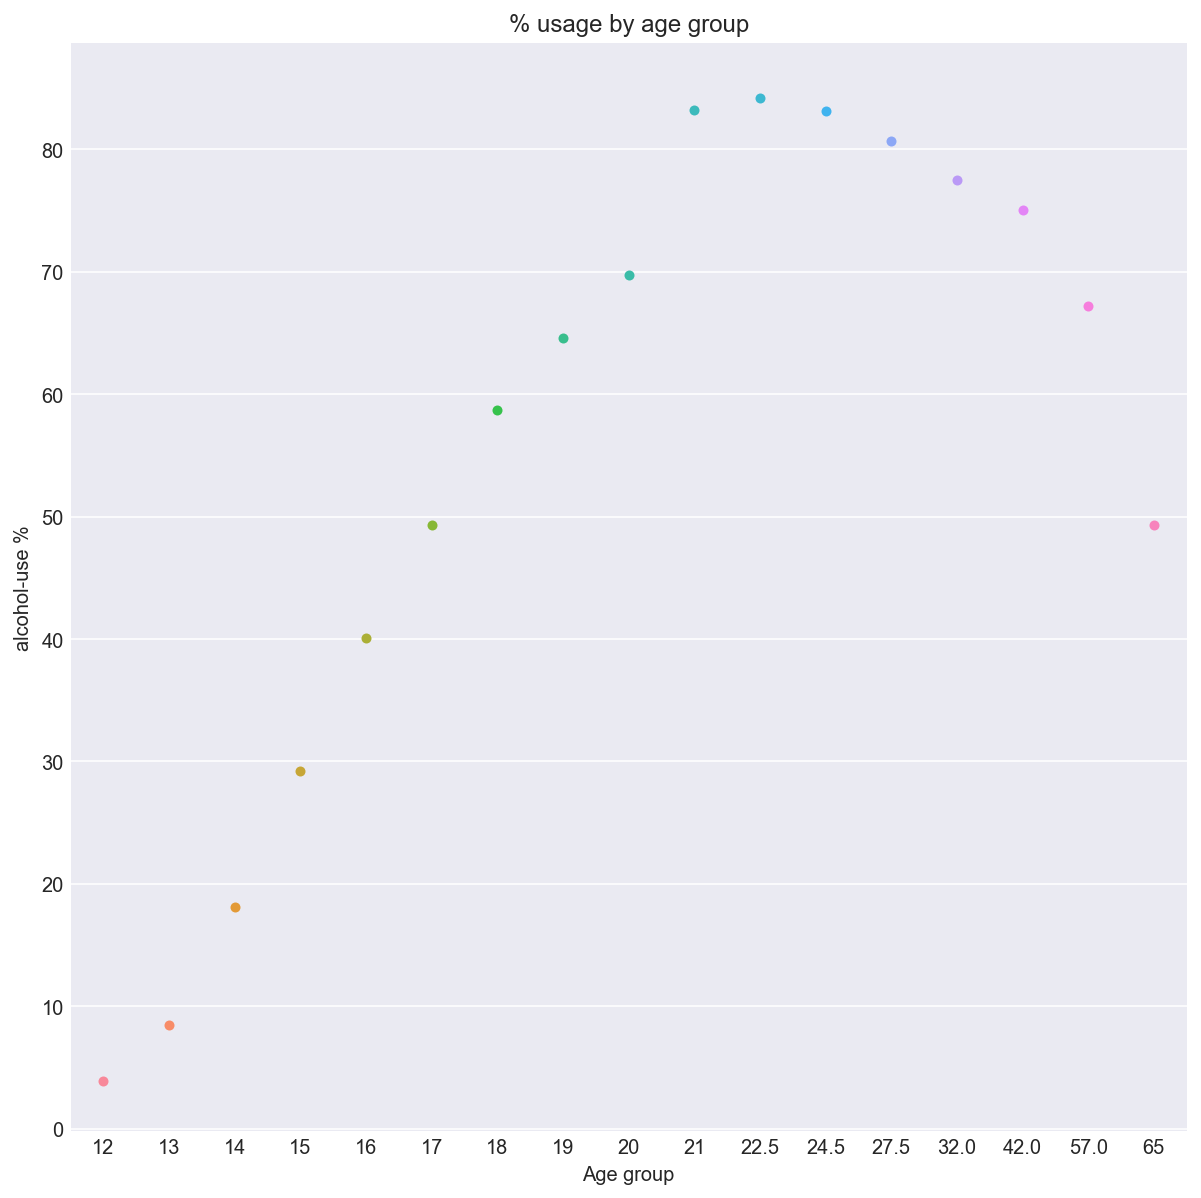

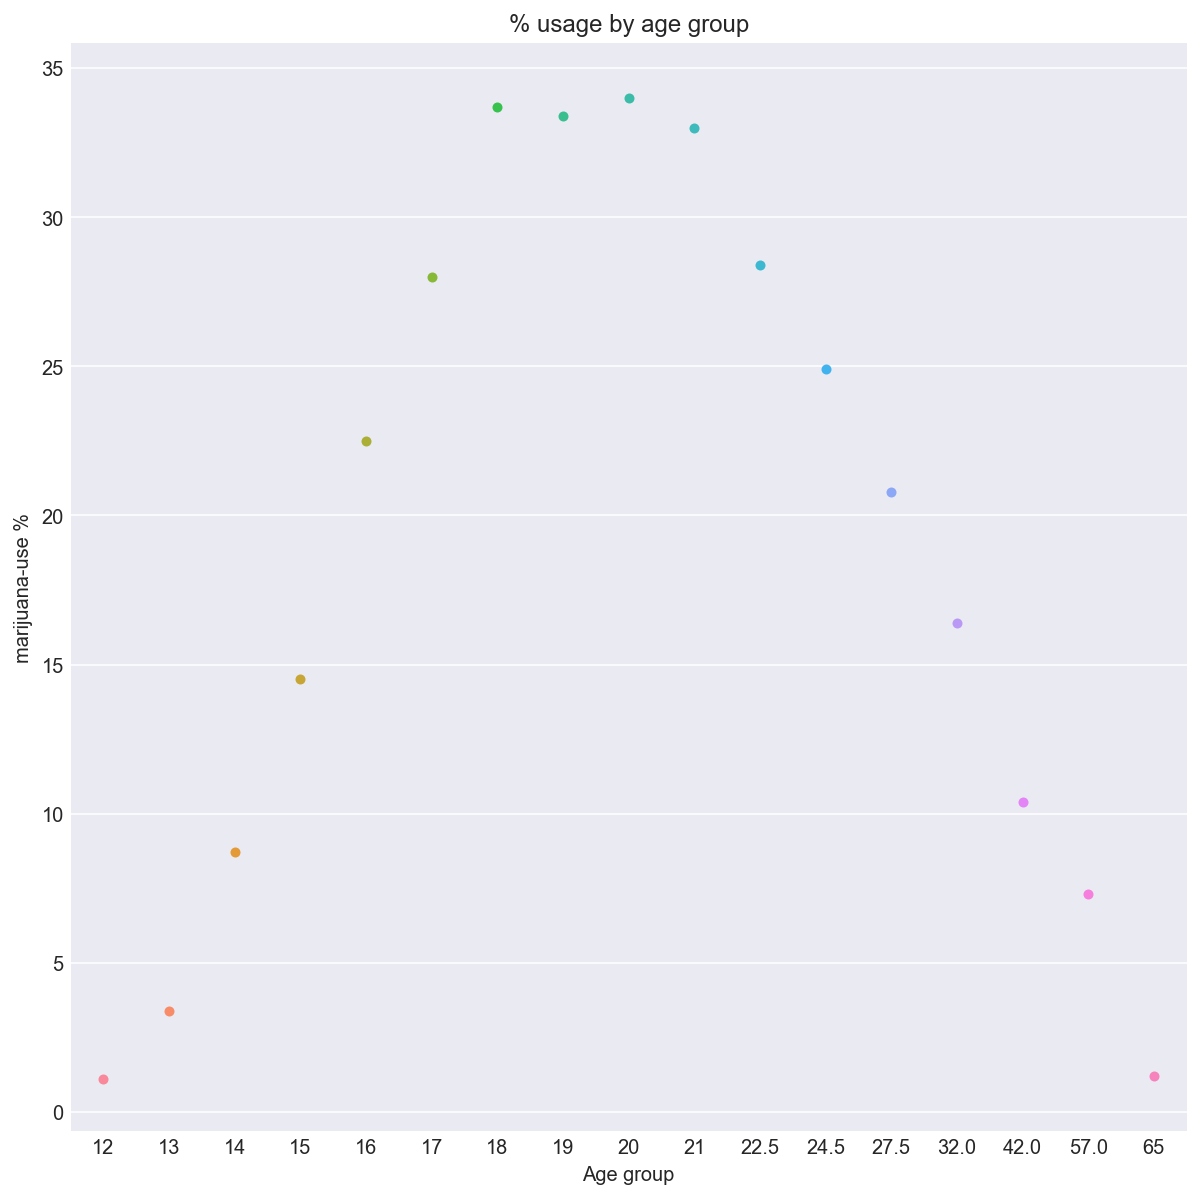

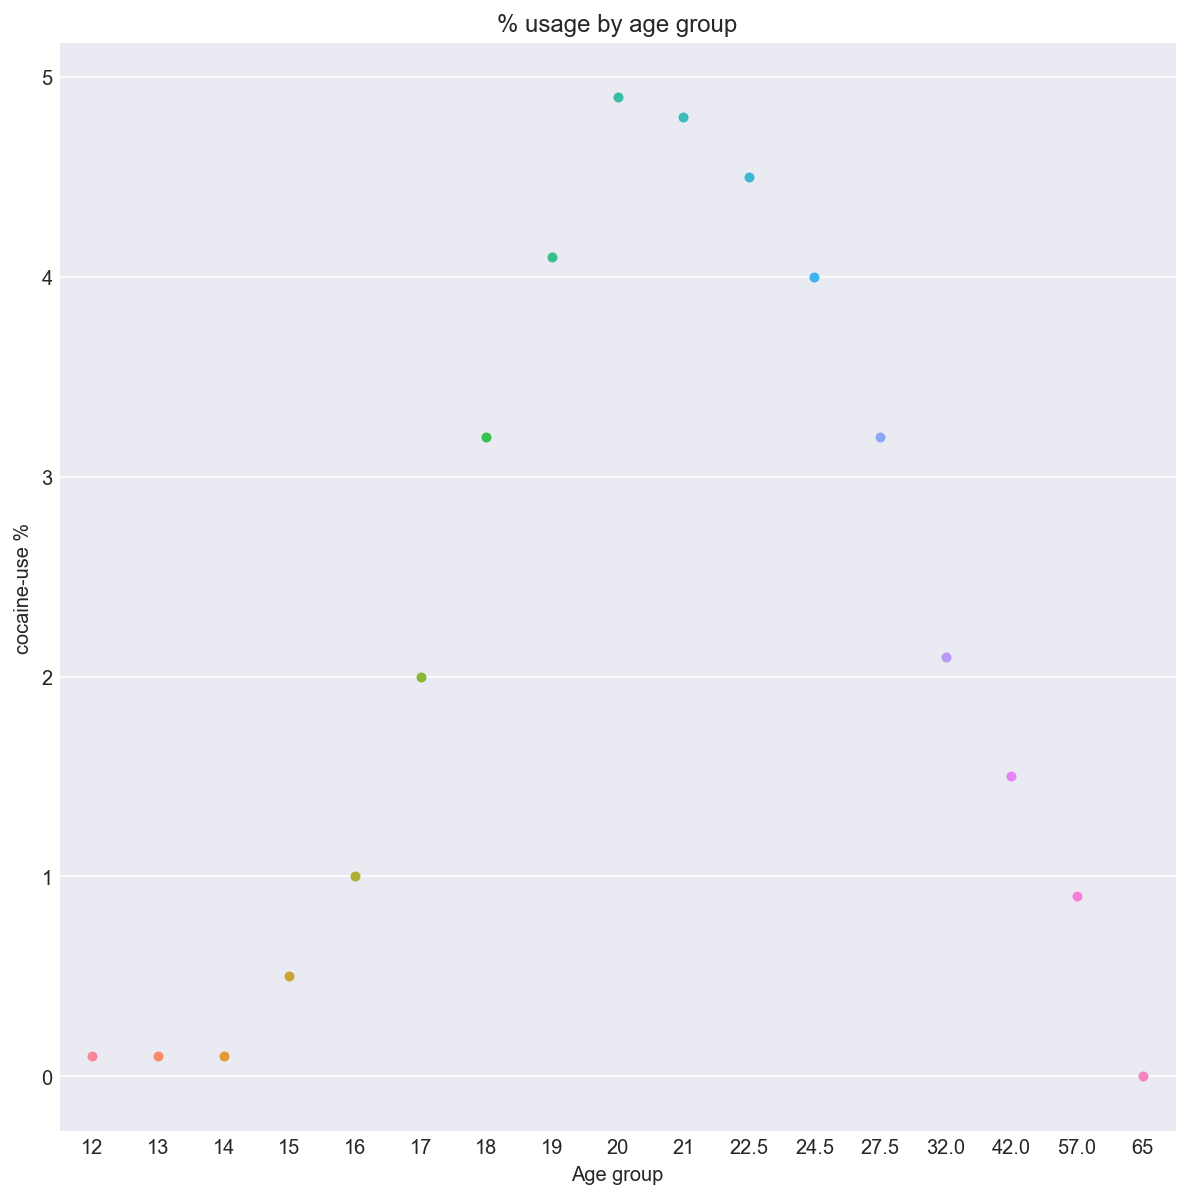

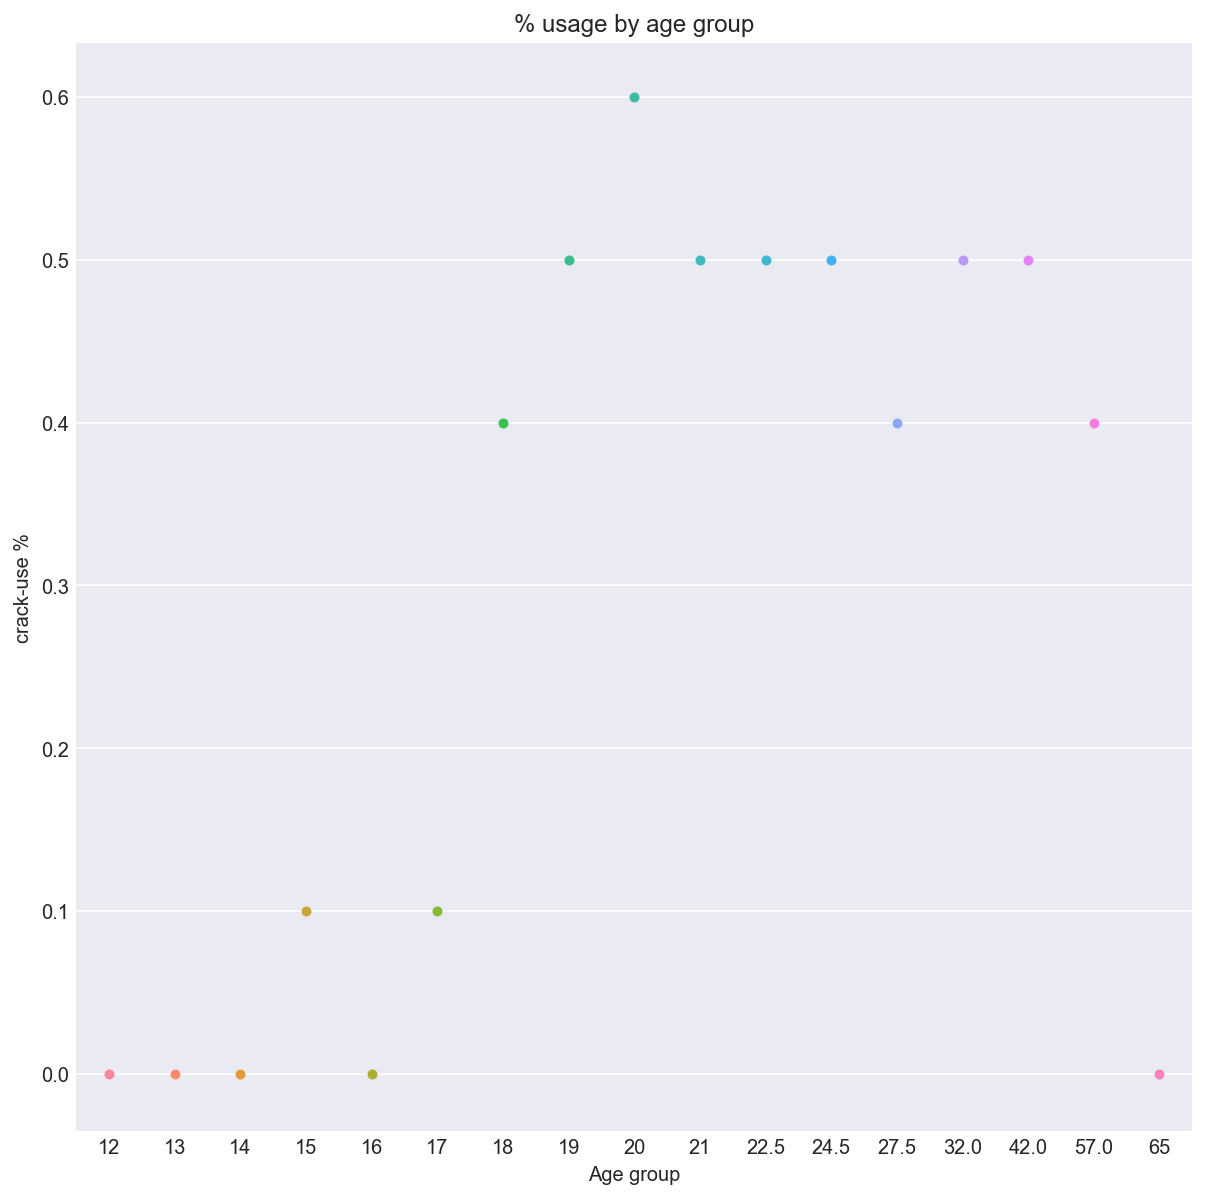

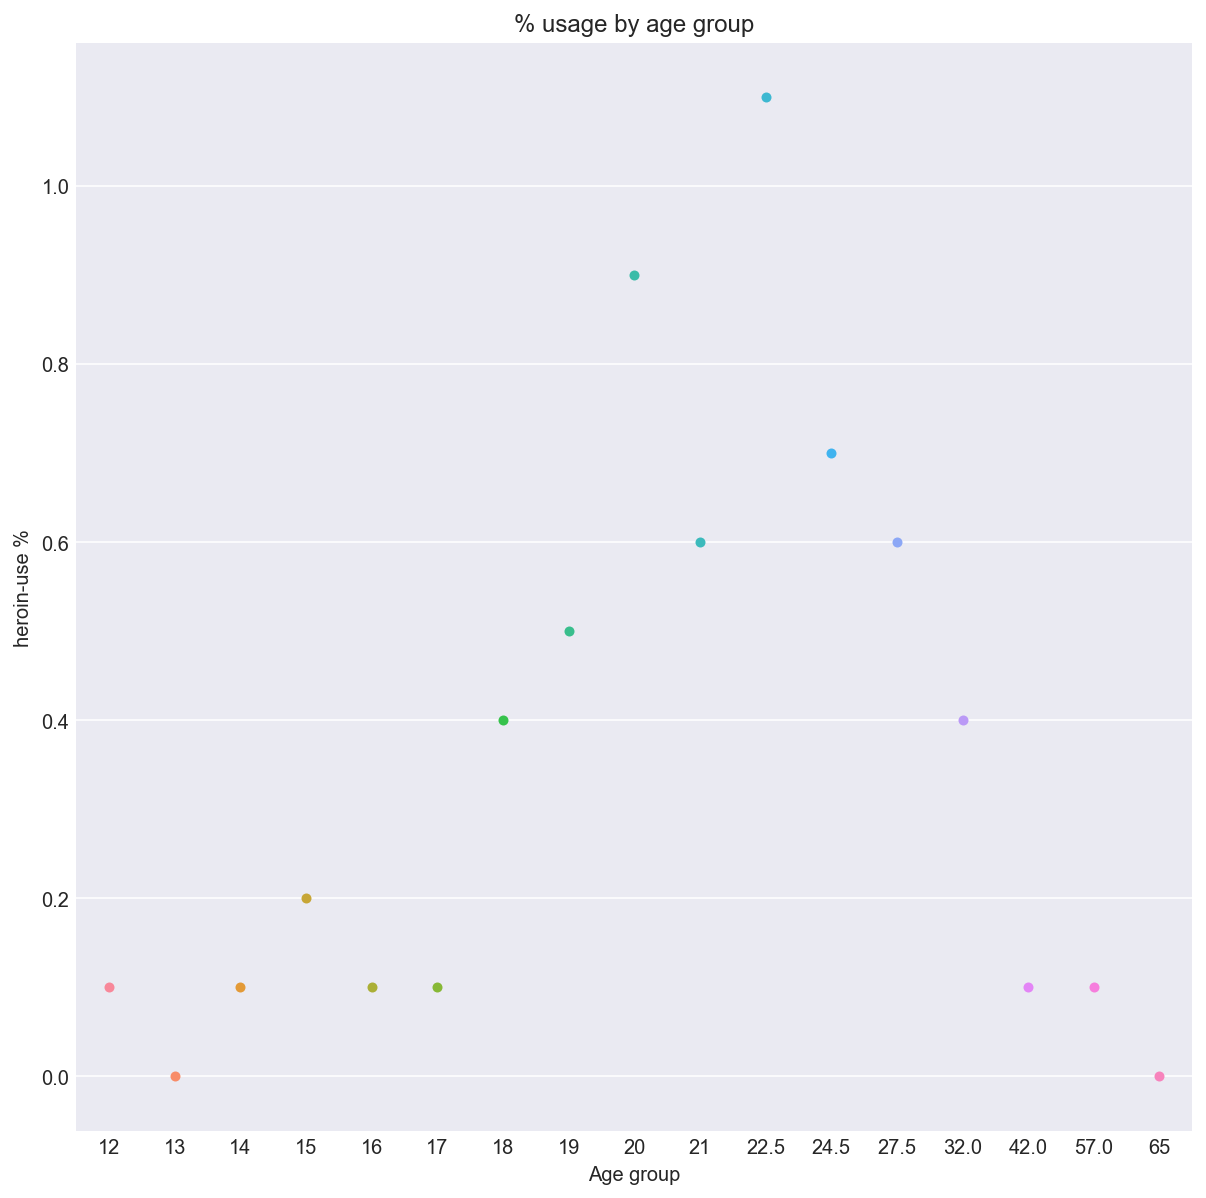

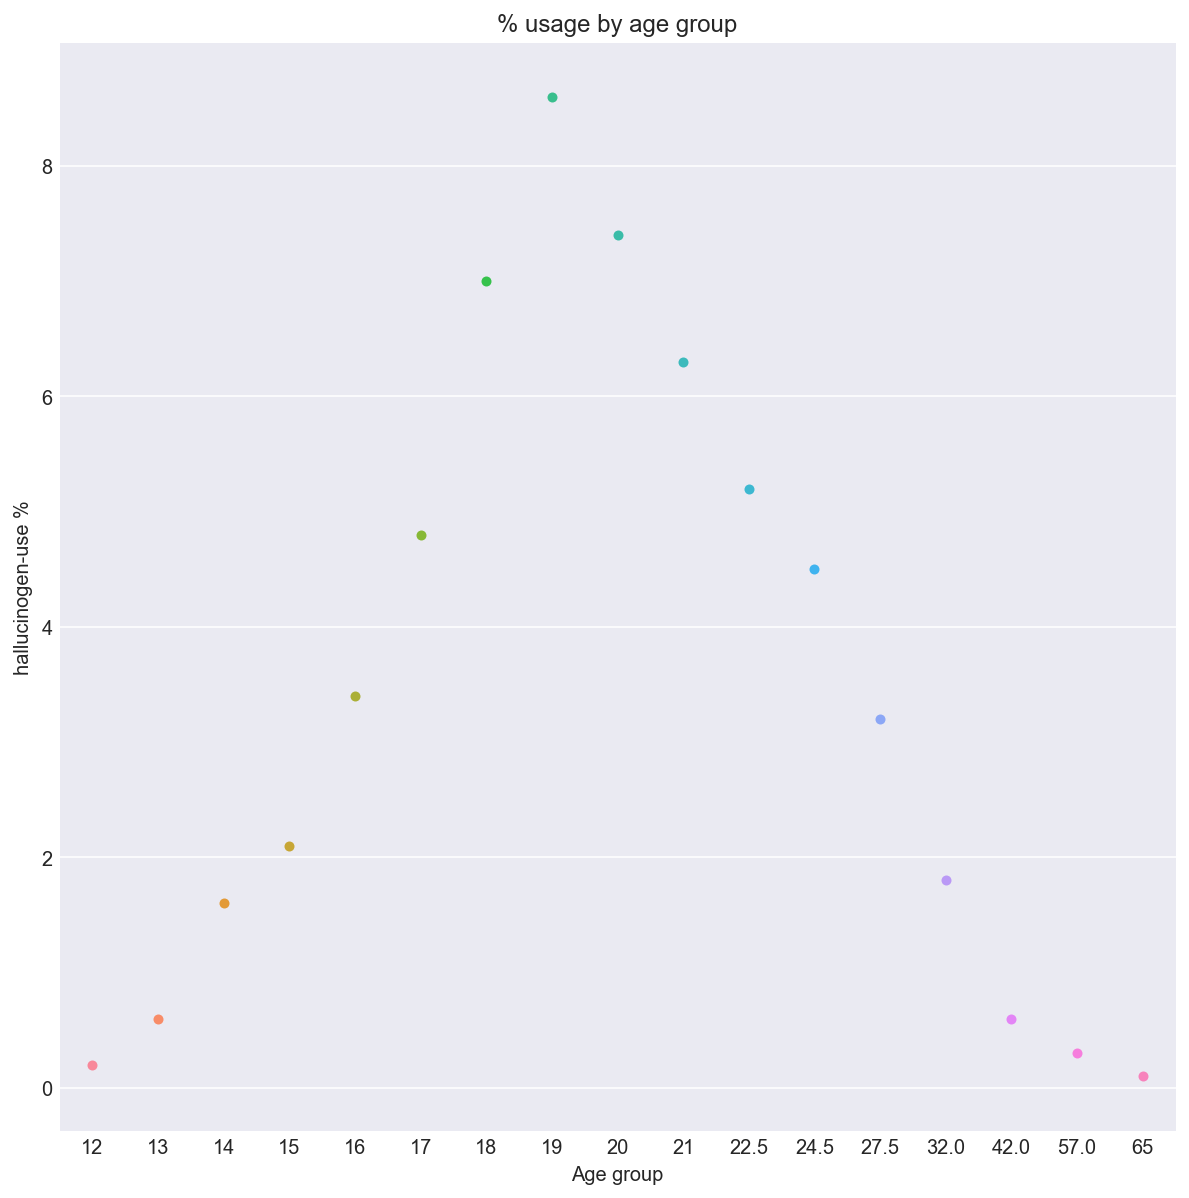

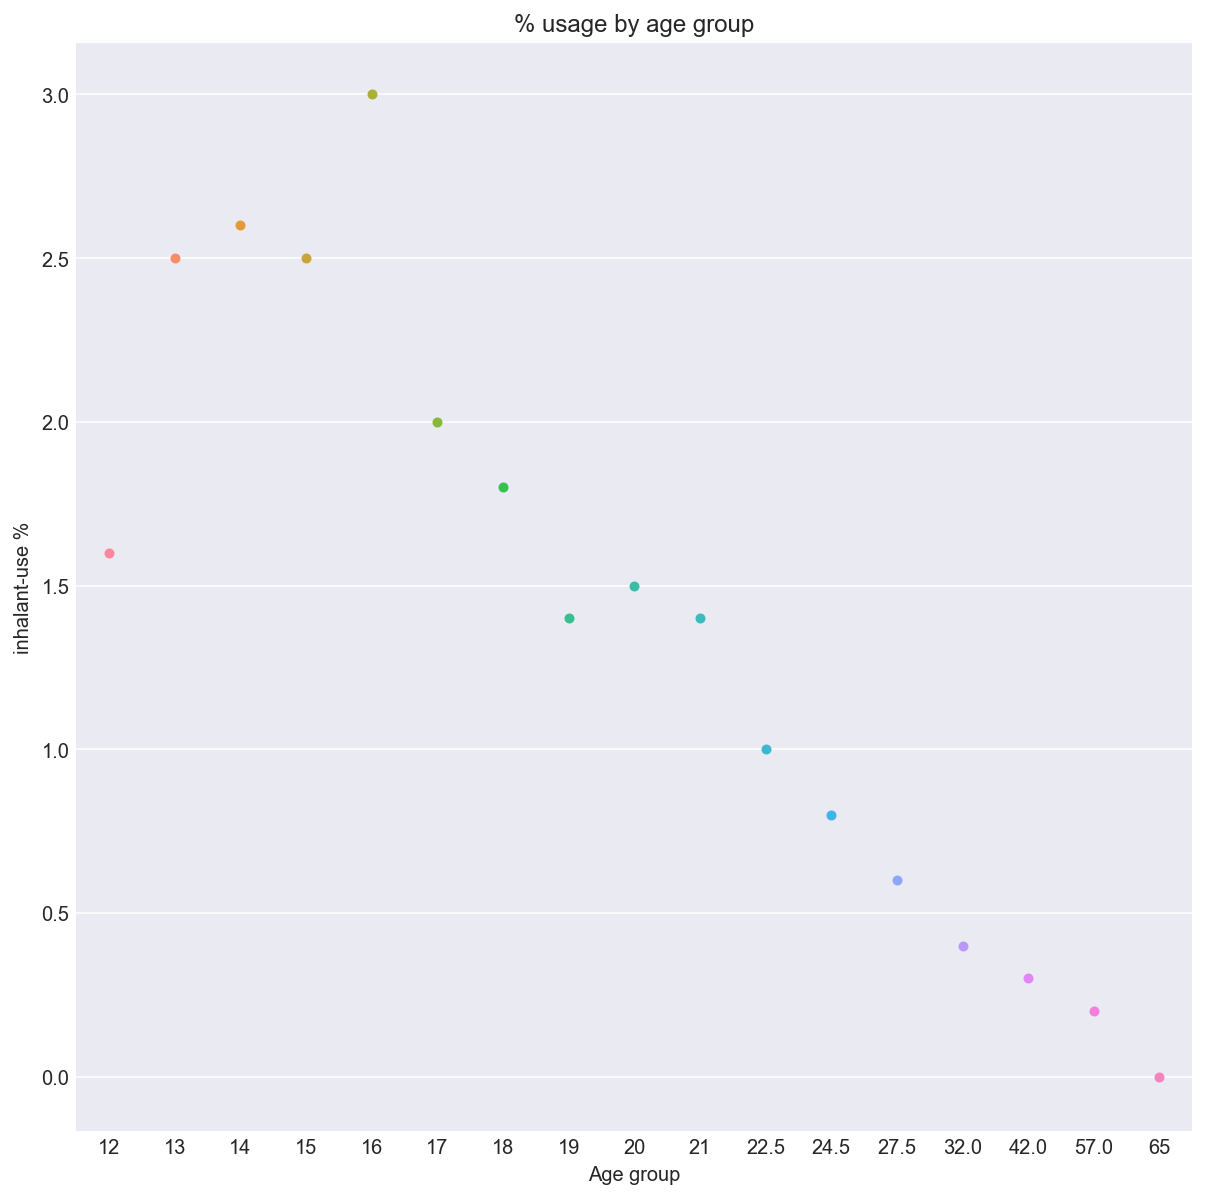

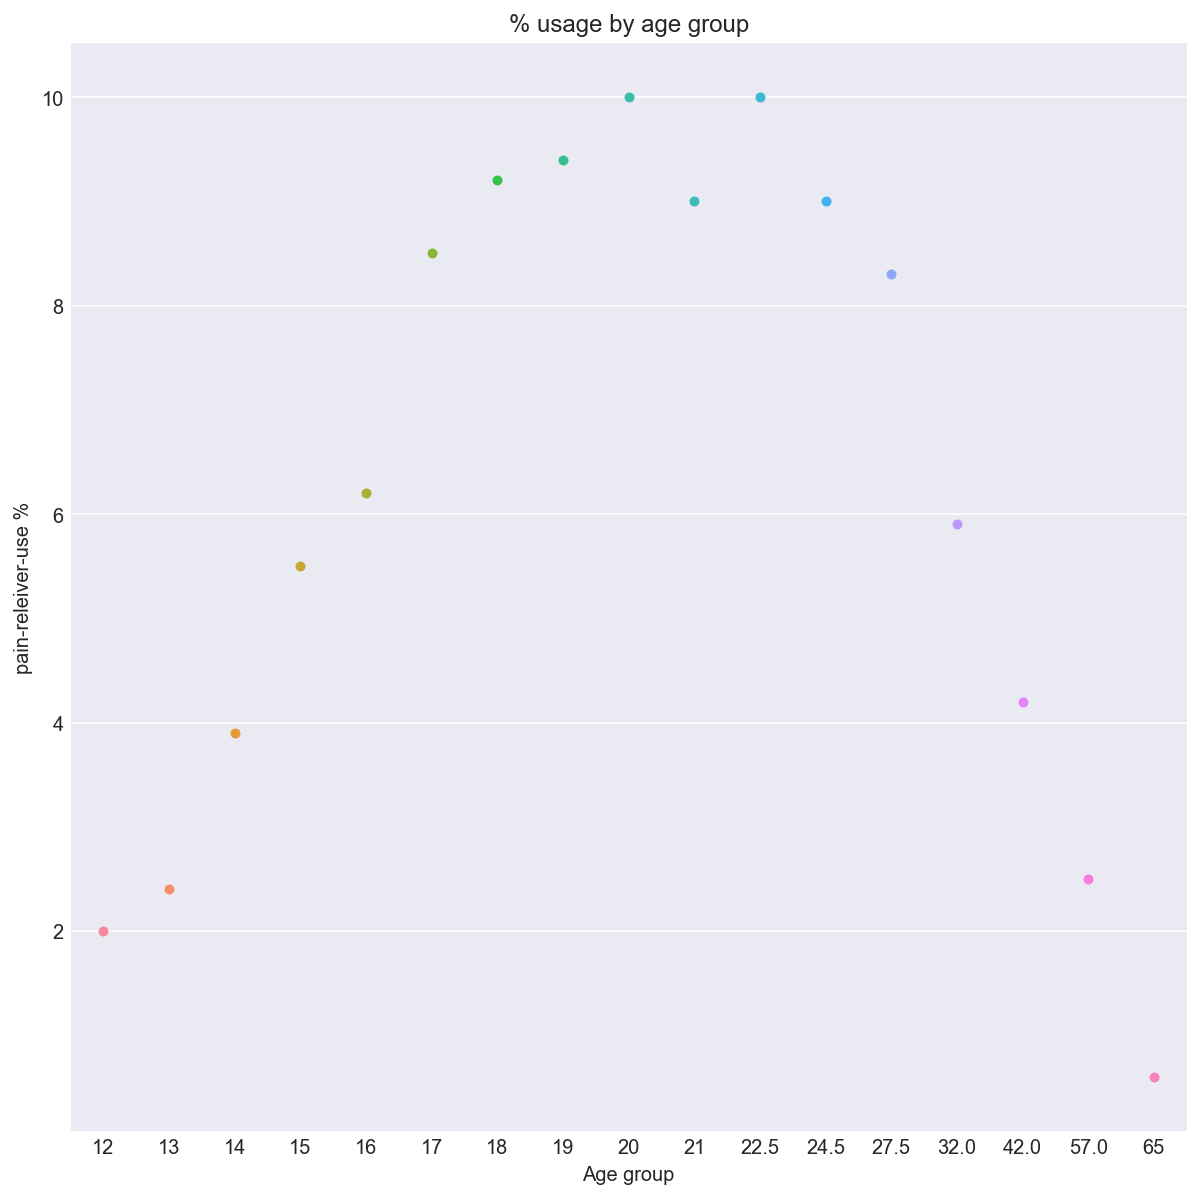

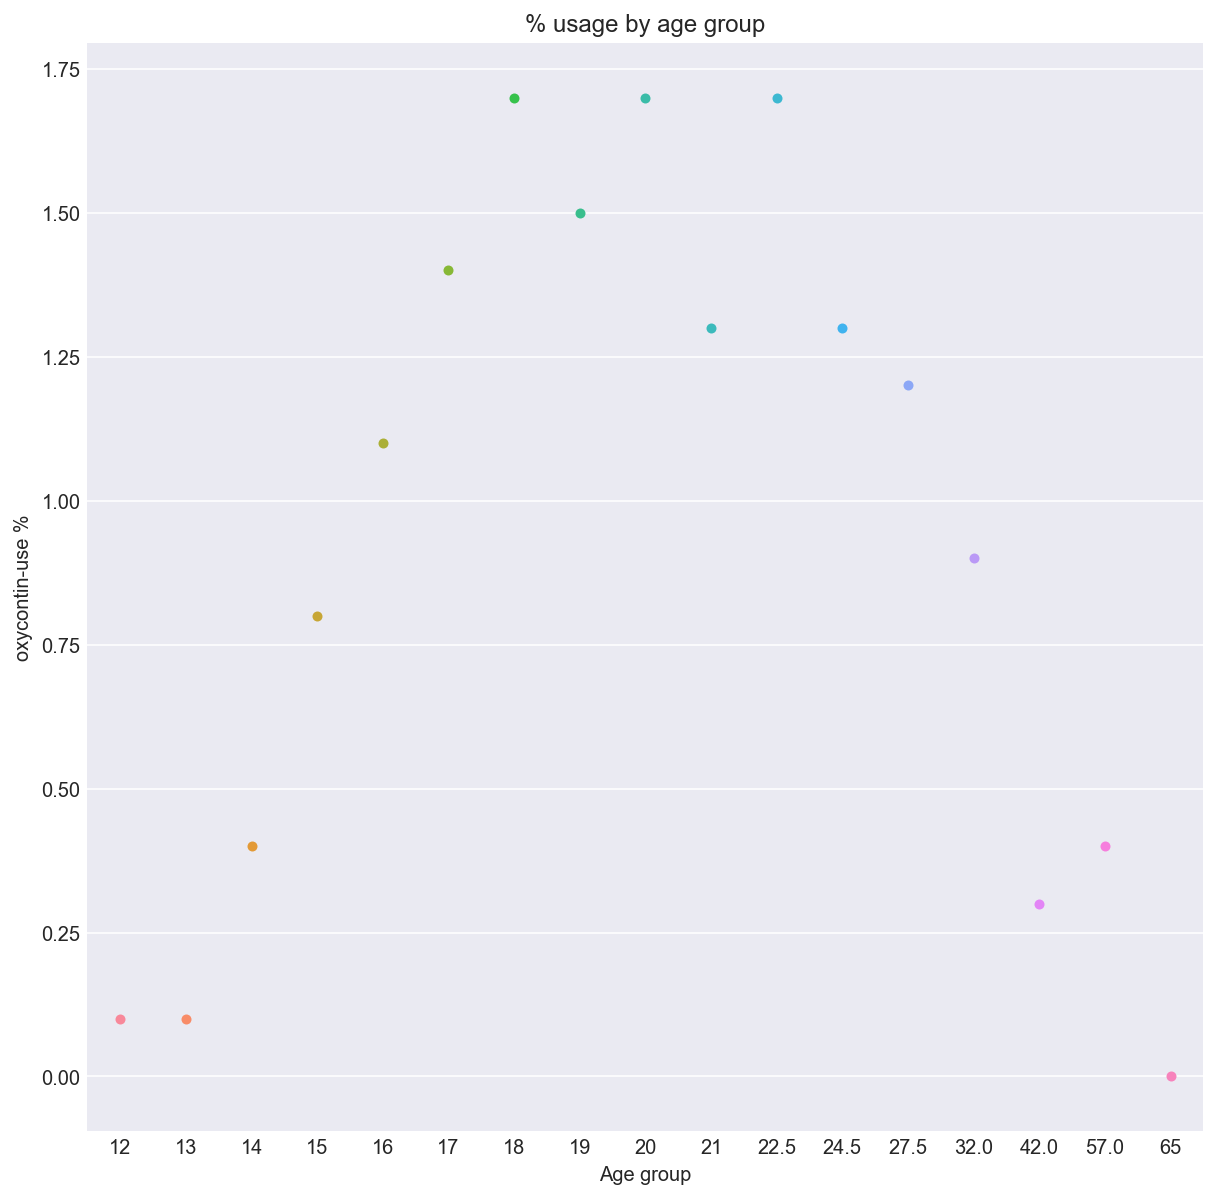

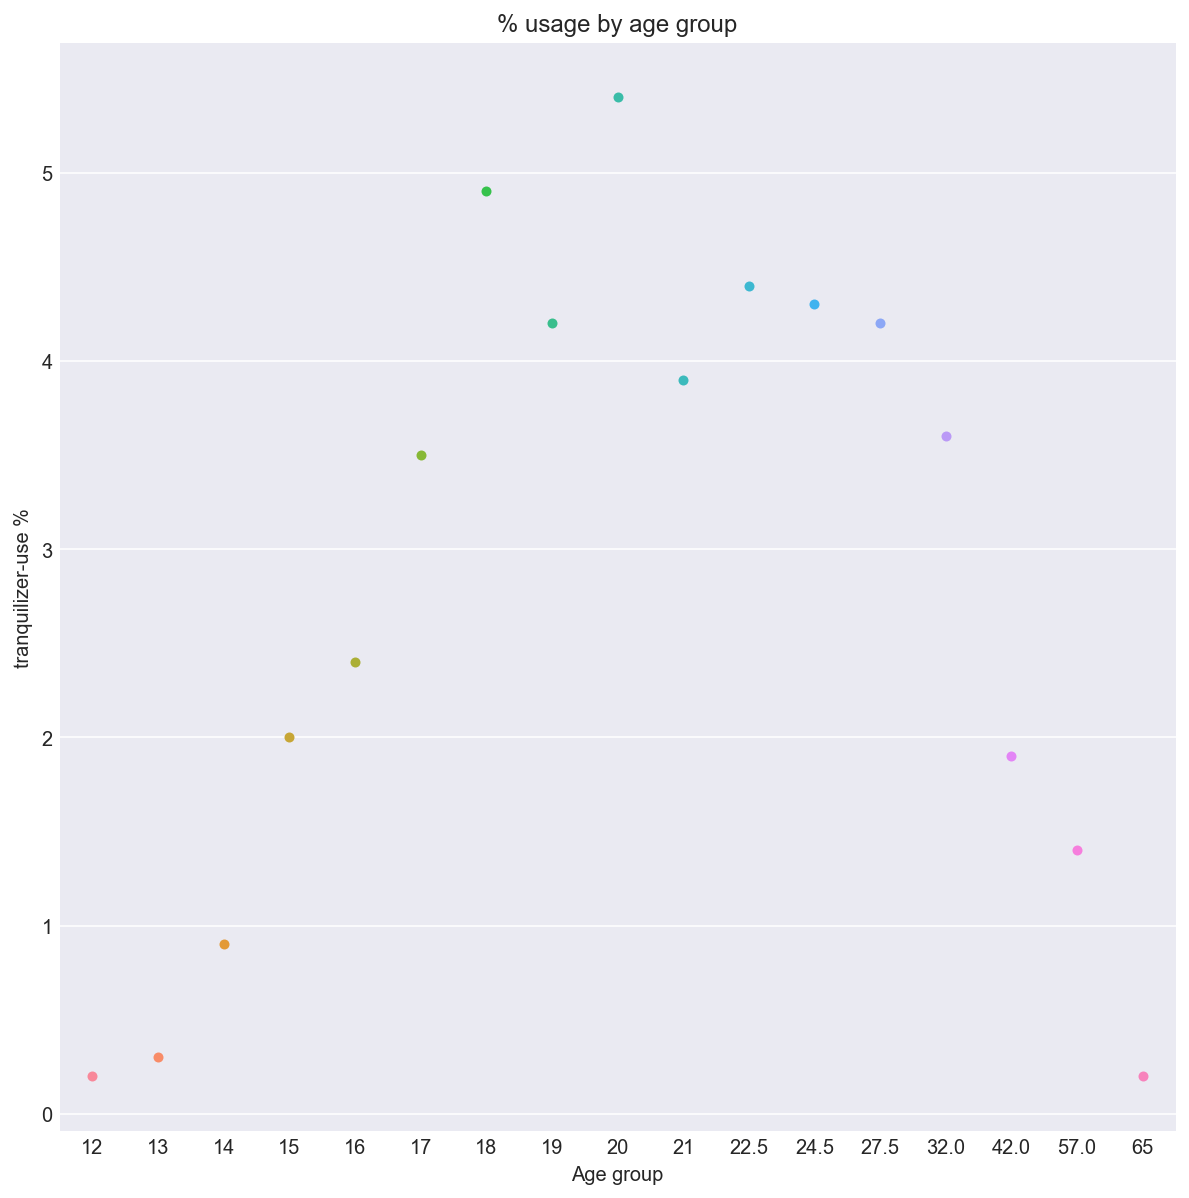

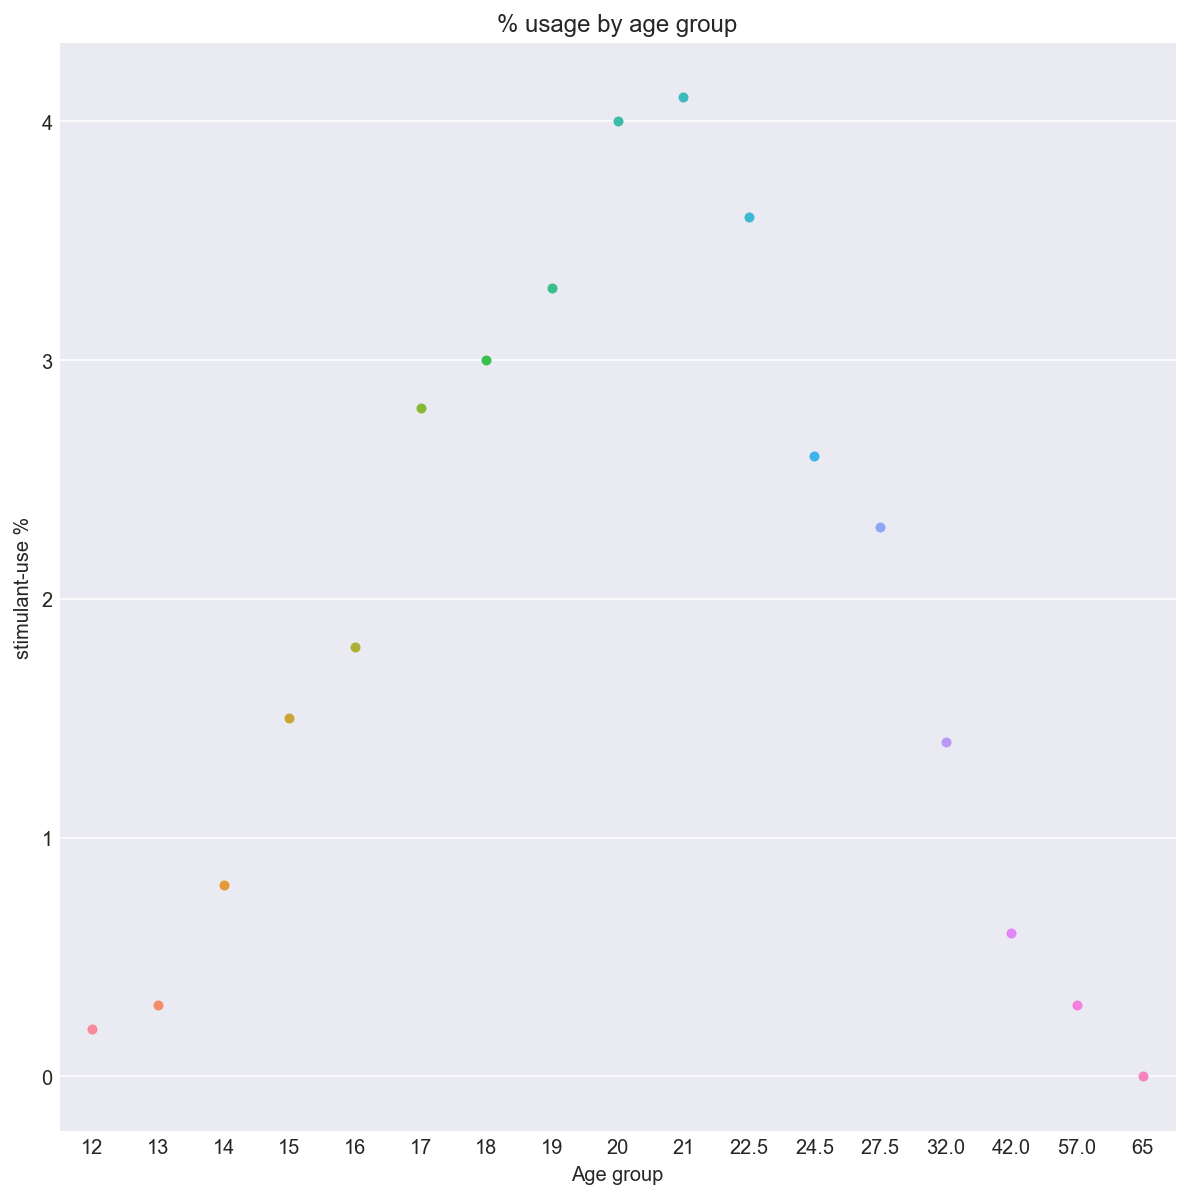

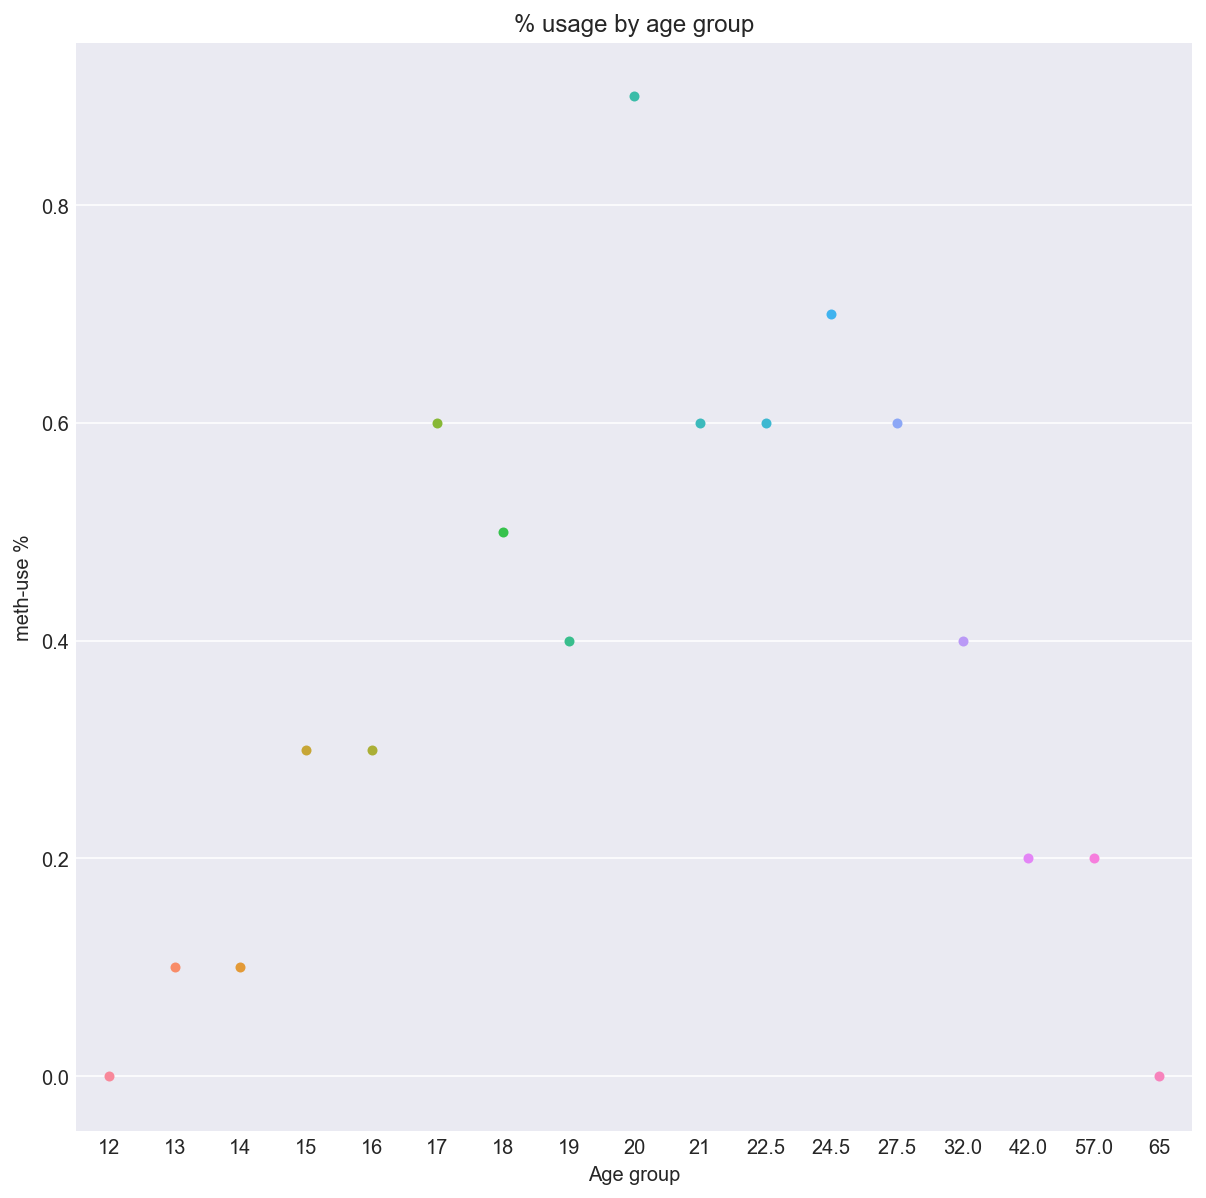

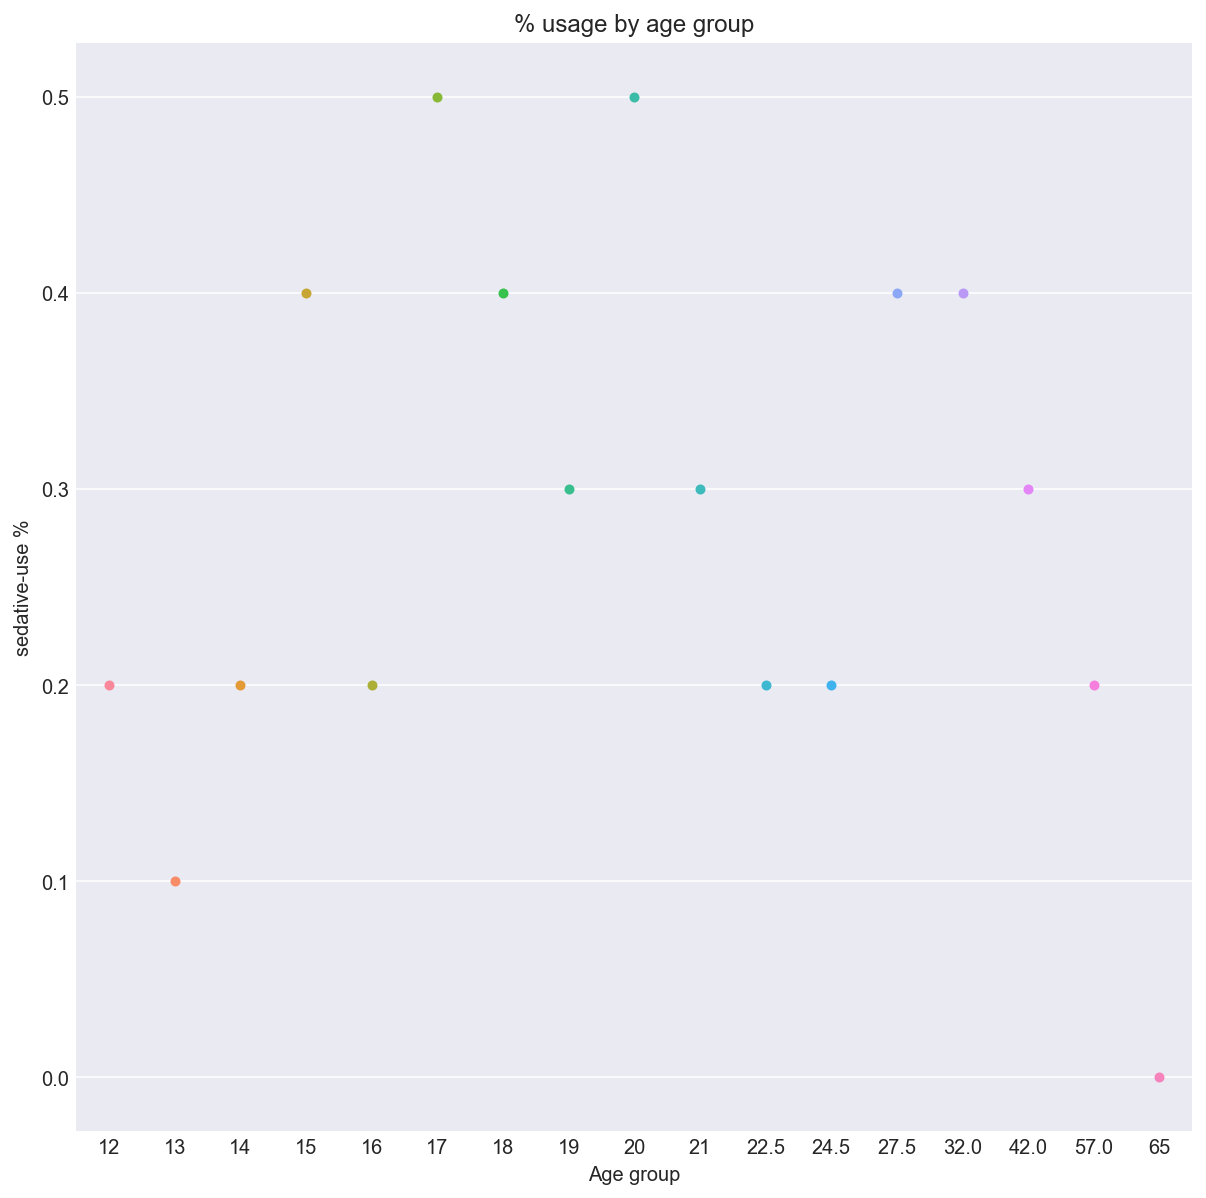

In [49]:
for drug in usage_df.columns.values:
    ax = plt.figure(figsize=(10, 10))
    ax = sns.stripplot(x=ages, y=usage_df[drug], data=usage_df[1:])
    ax.set( xlabel='Age group', ylabel=drug+ ' %', title='% usage by age group')

#### Frequency

In [50]:
freq_columns = [col for col in drug_df.columns if 'frequency' in col ]

freq_df = drug_df[freq_columns]

In [51]:
freq_df.insert(0, 'age', ages)
freq_df

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


In [52]:
freq_df.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


In [53]:
freq_df.corr()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana-frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine-frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack-frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin-frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen-frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant-frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-releiver-frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin-frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer-frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


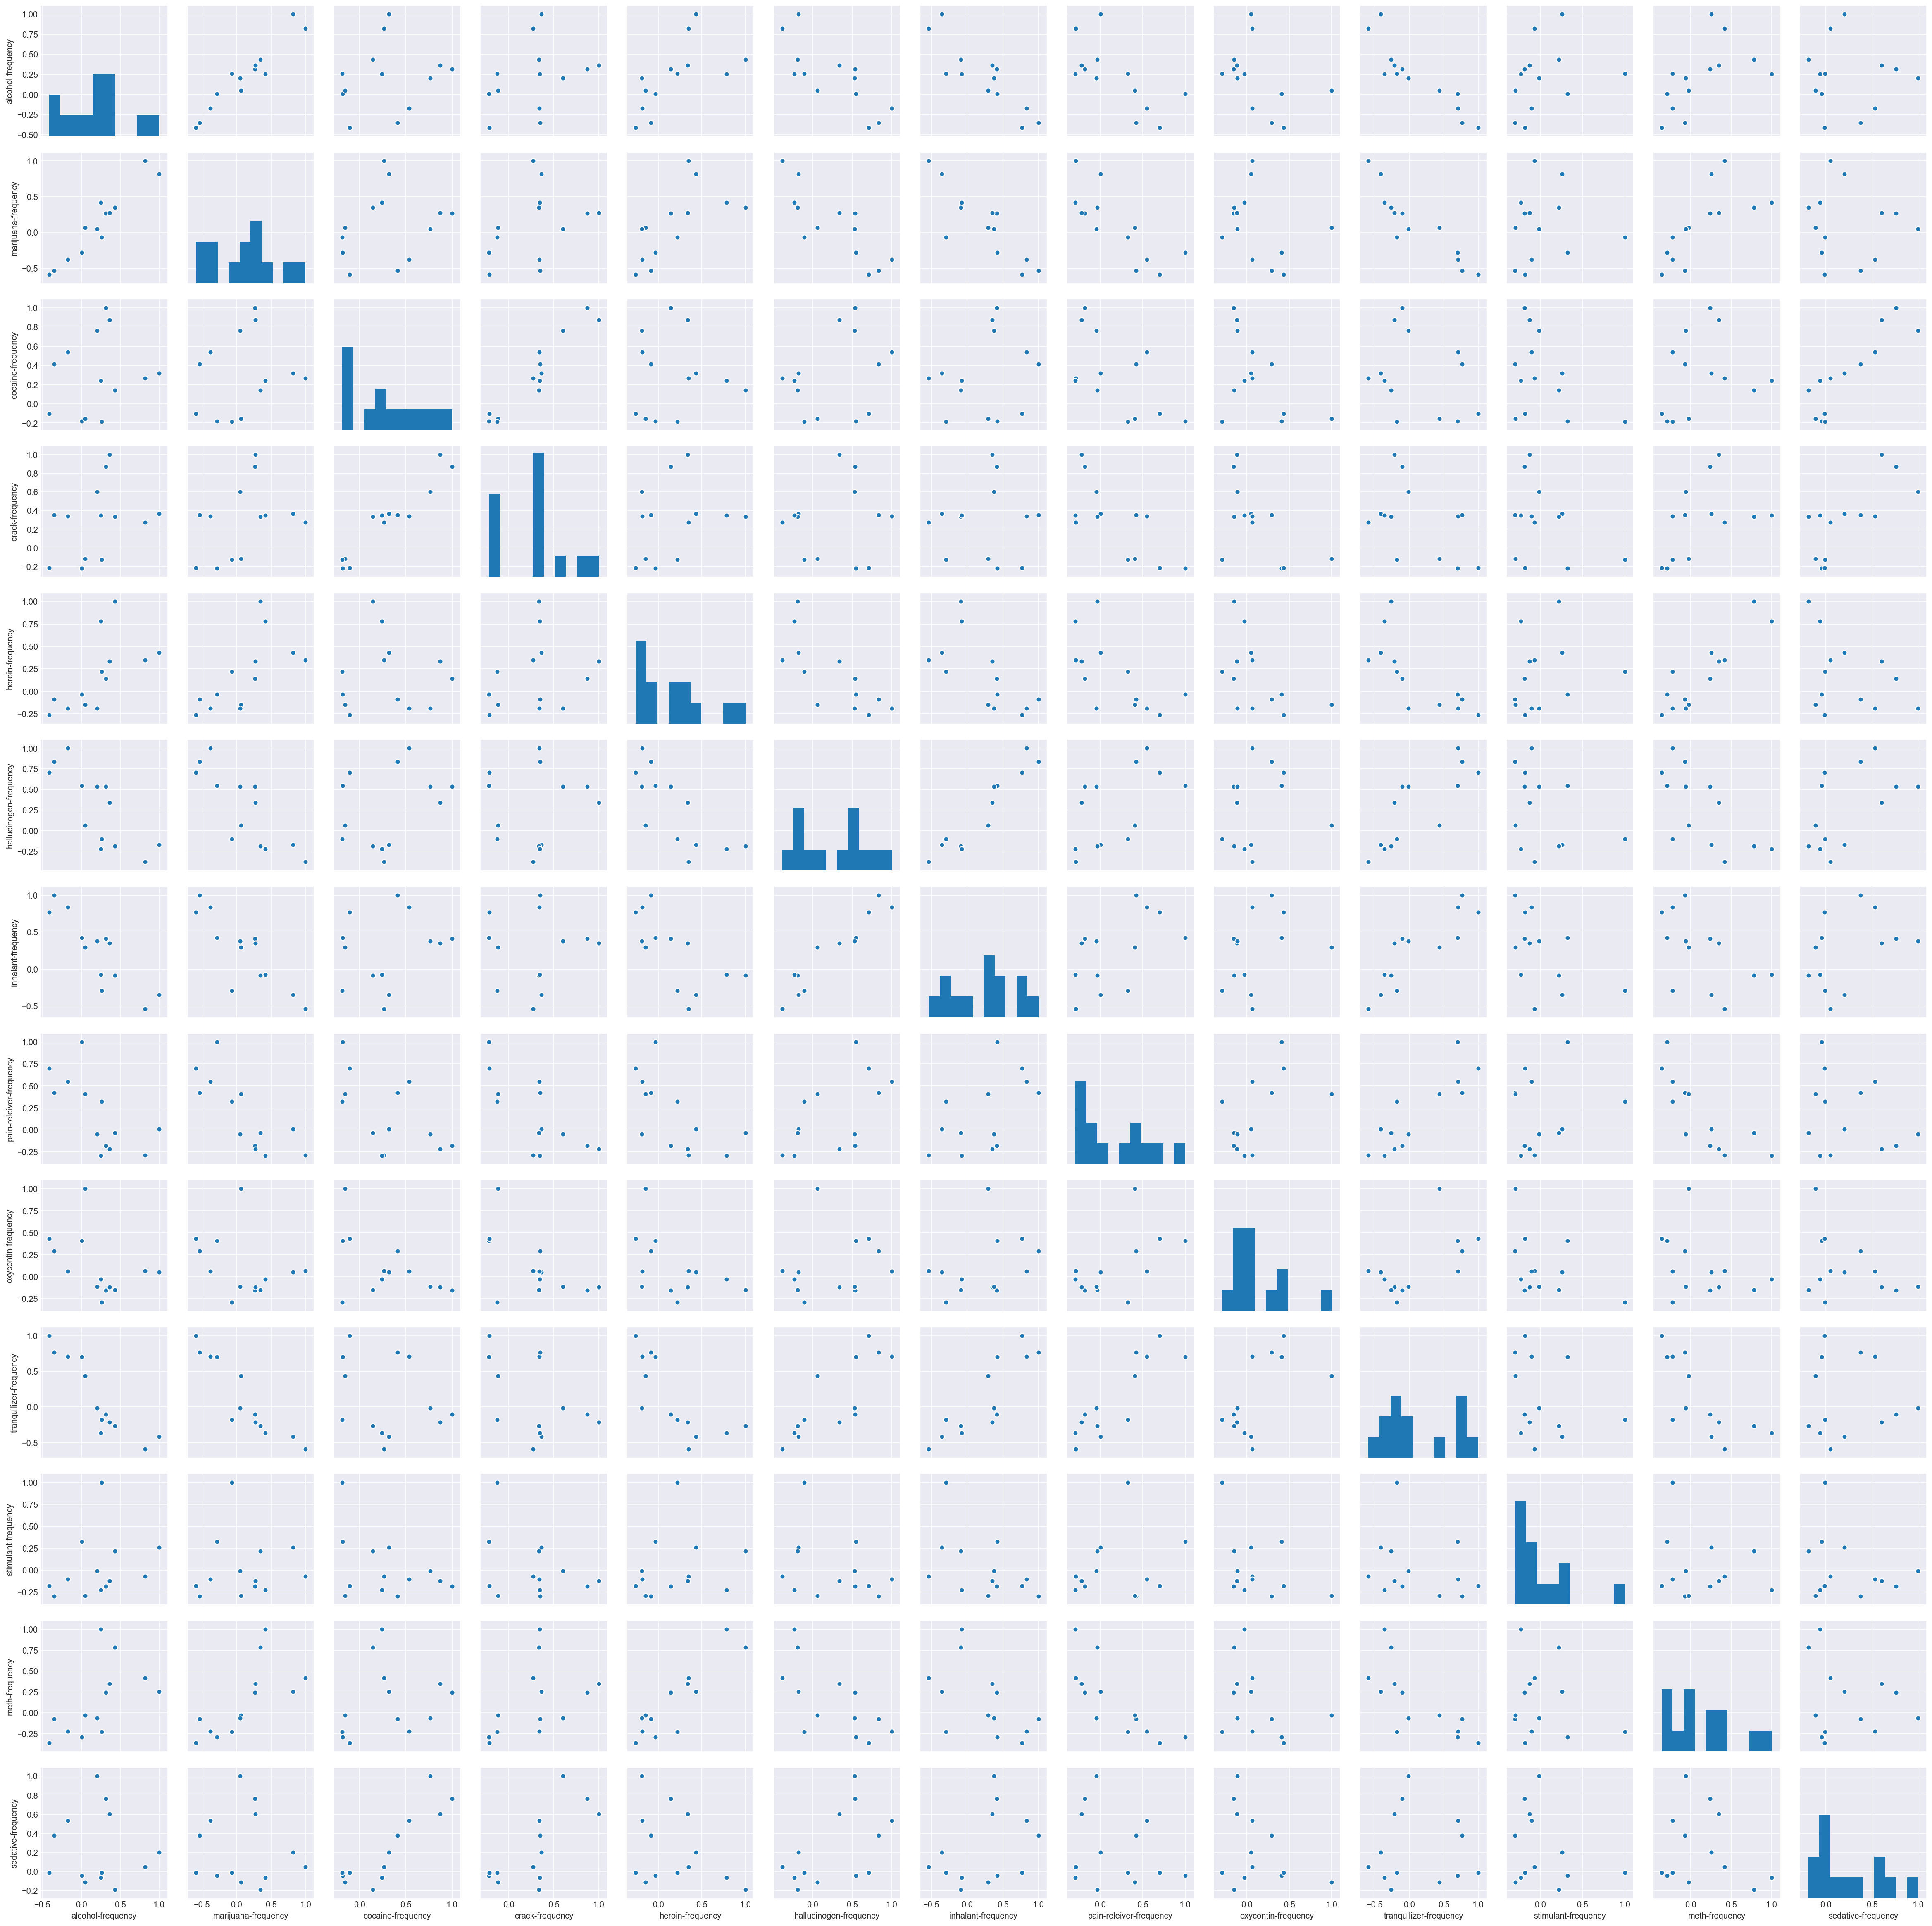

In [54]:
sns.pairplot(freq_df.corr())

Text(0.5,1,'Median frequency by drug type')

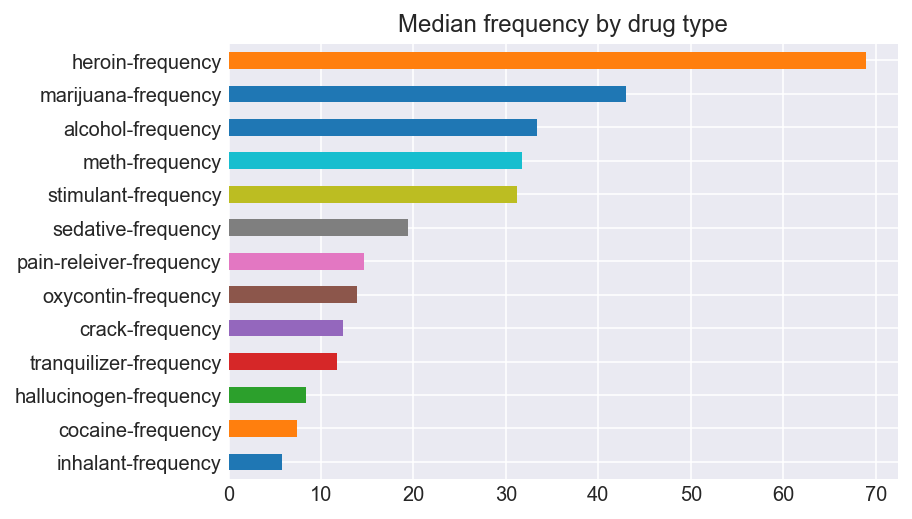

In [55]:
freq_df.mean().sort_values(ascending=True).plot(kind='barh').set_title('Median frequency by drug type')
# Top 3 - Heroin, marijuana, alcohol

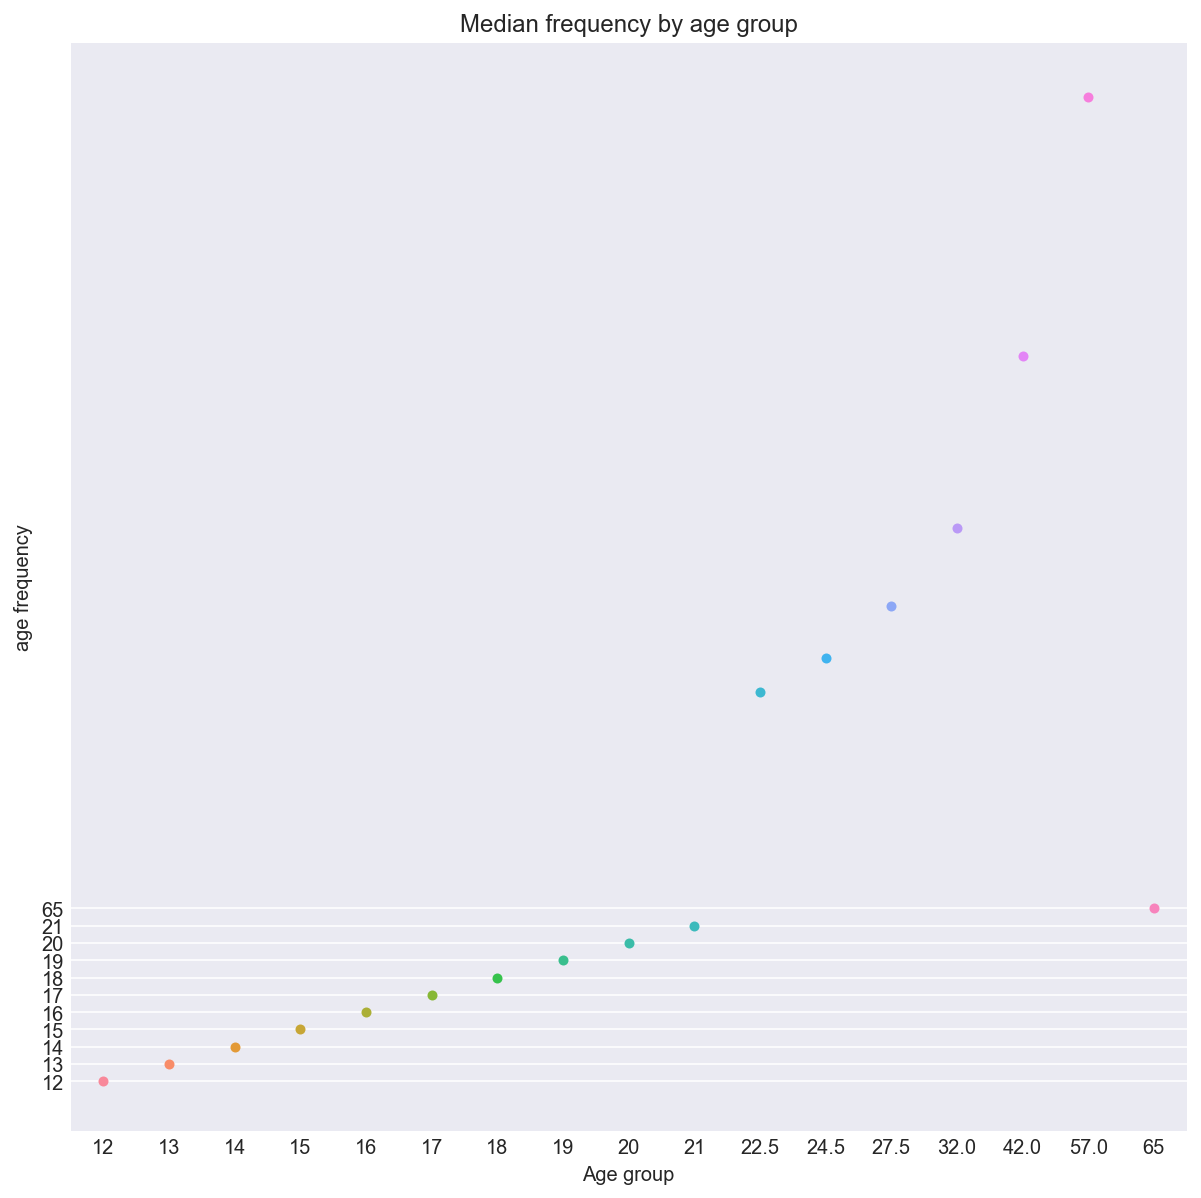

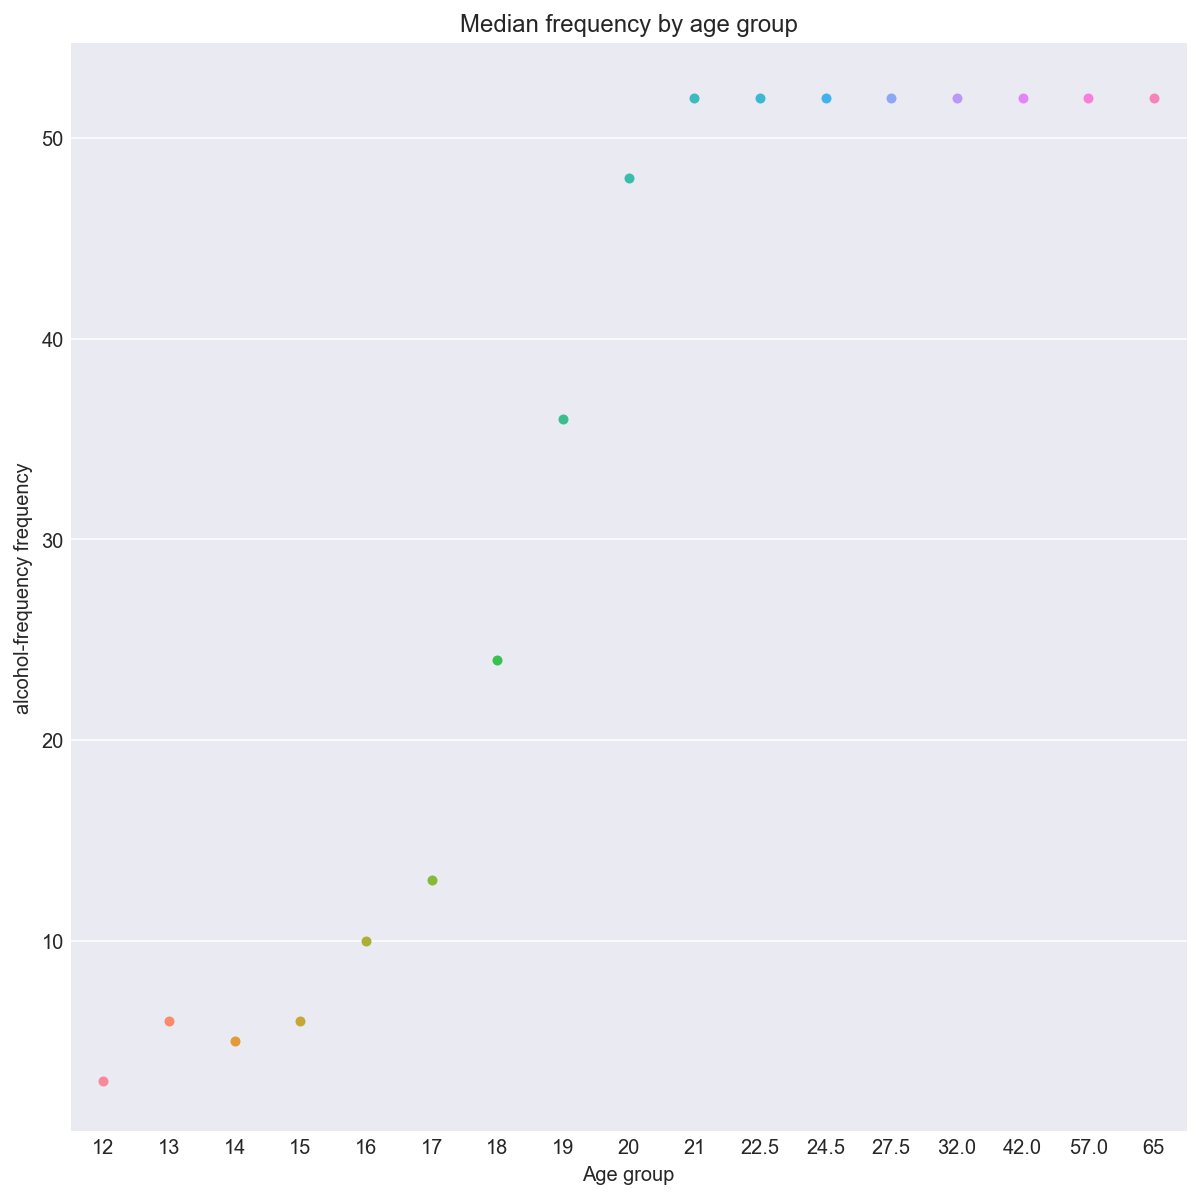

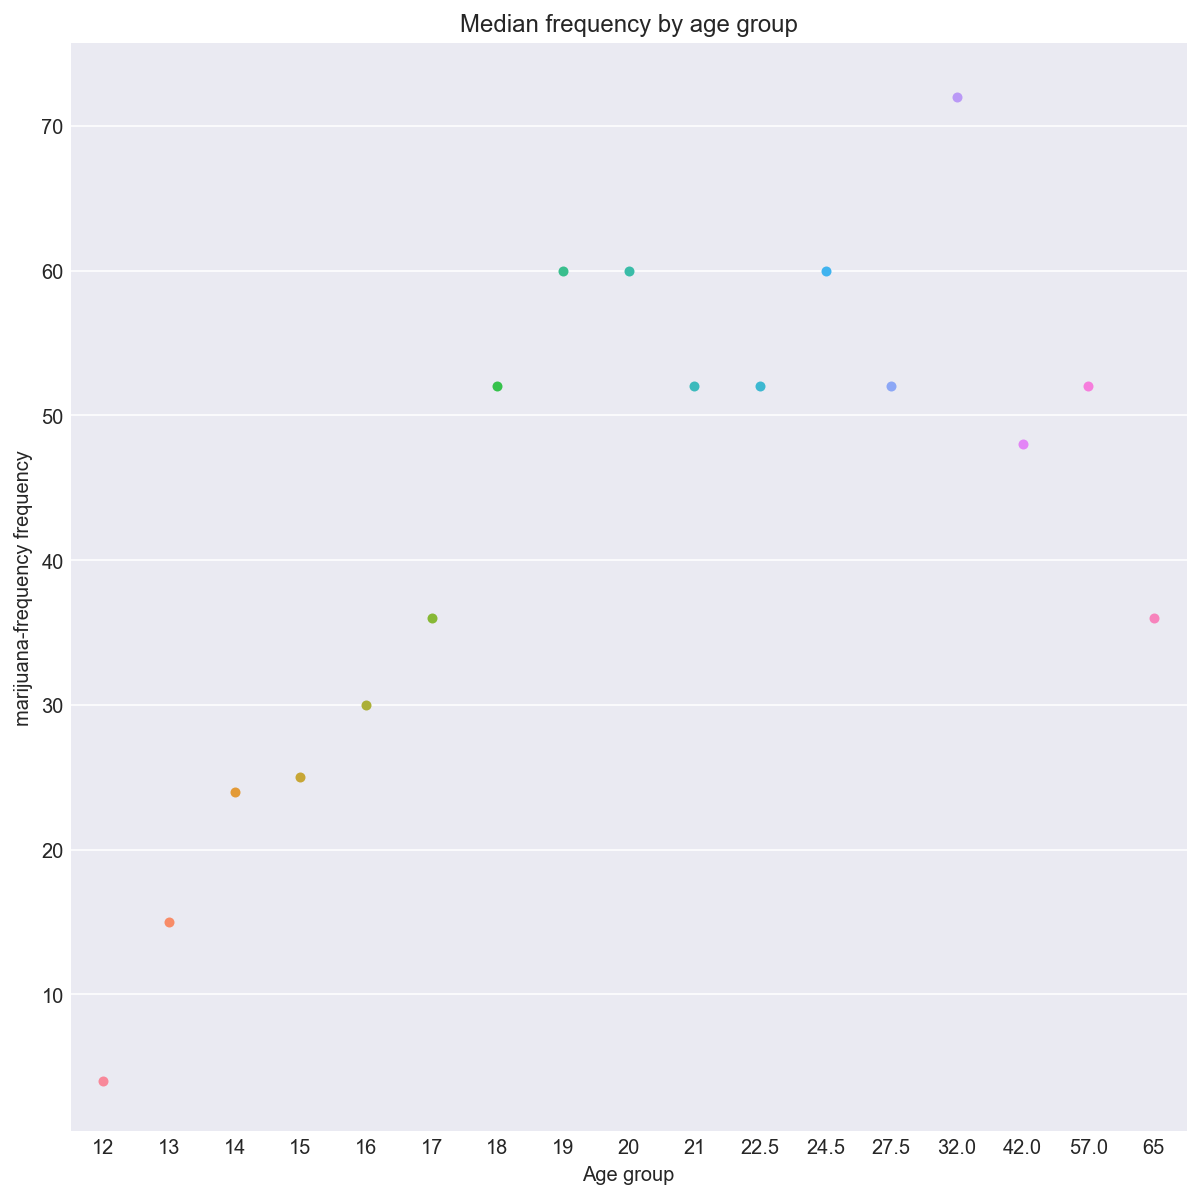

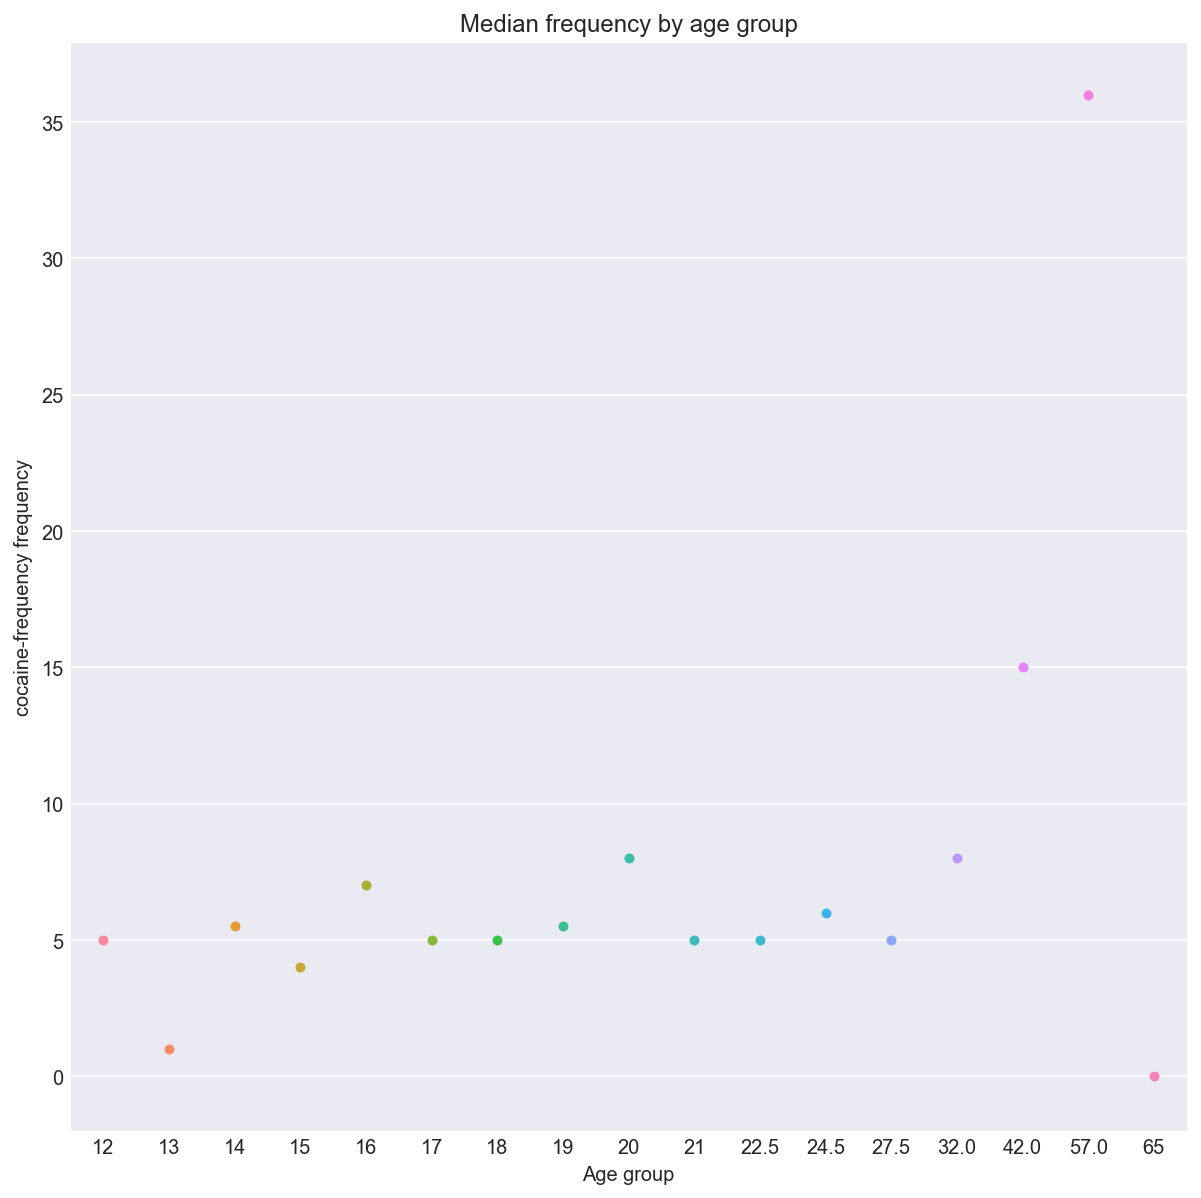

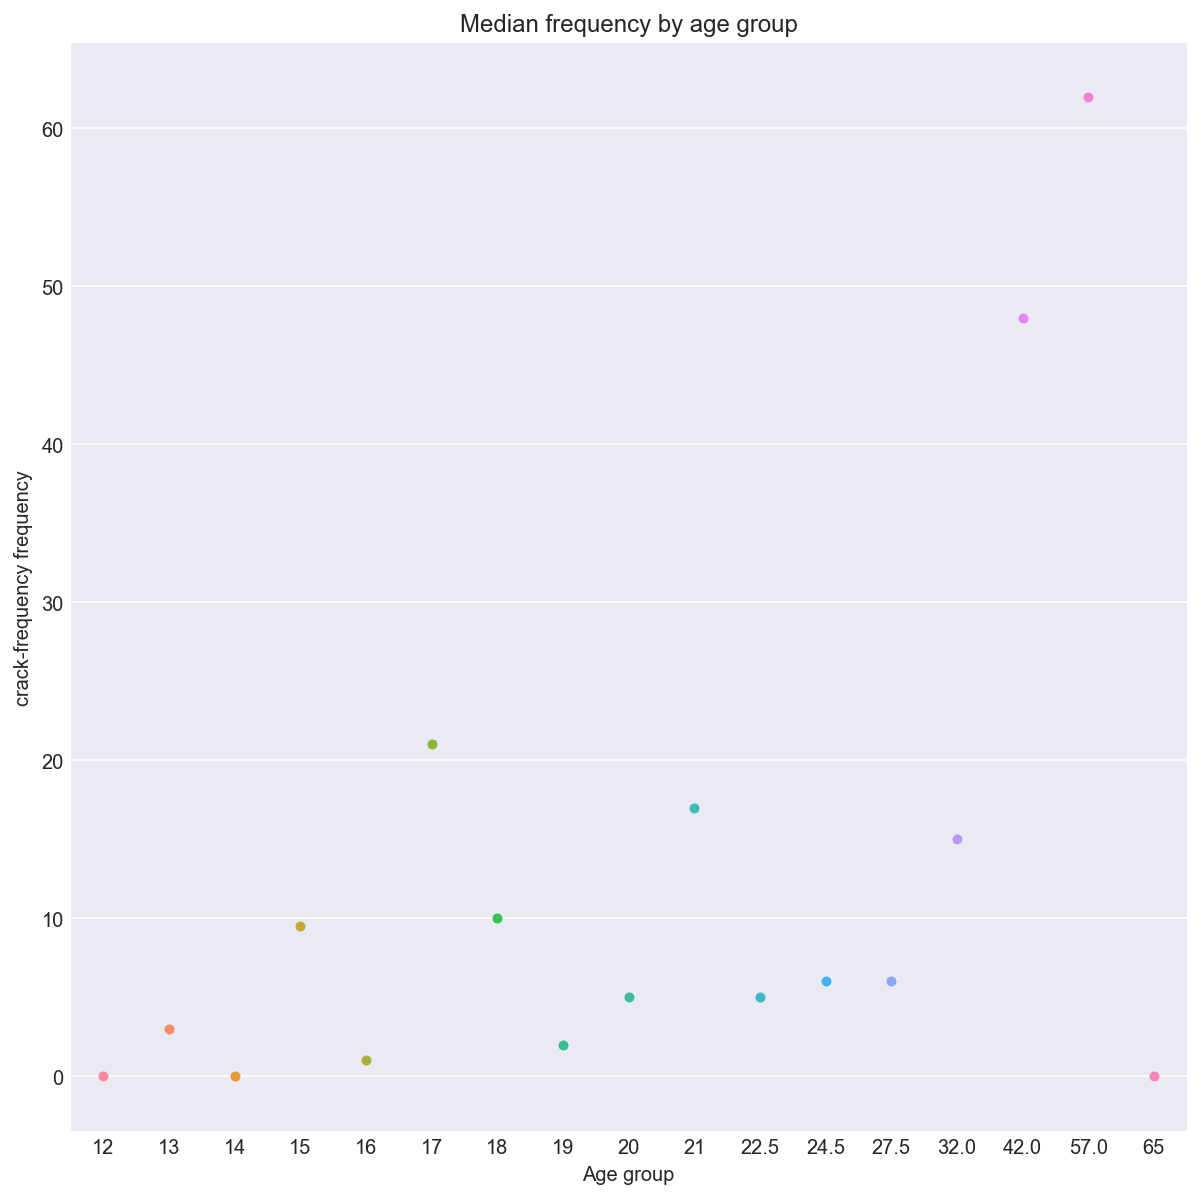

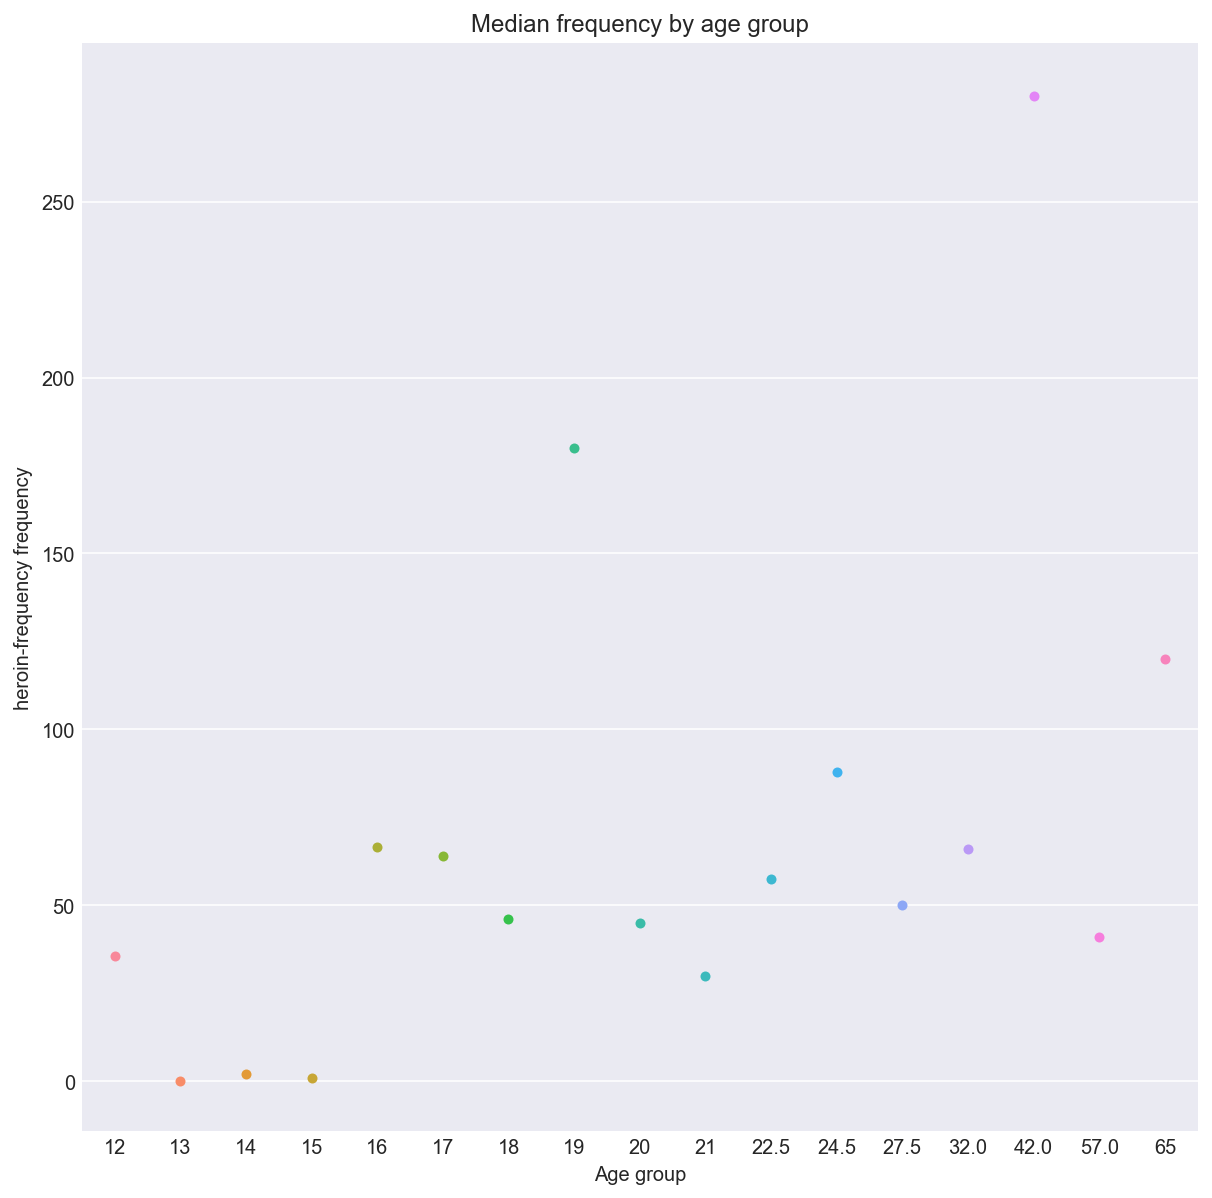

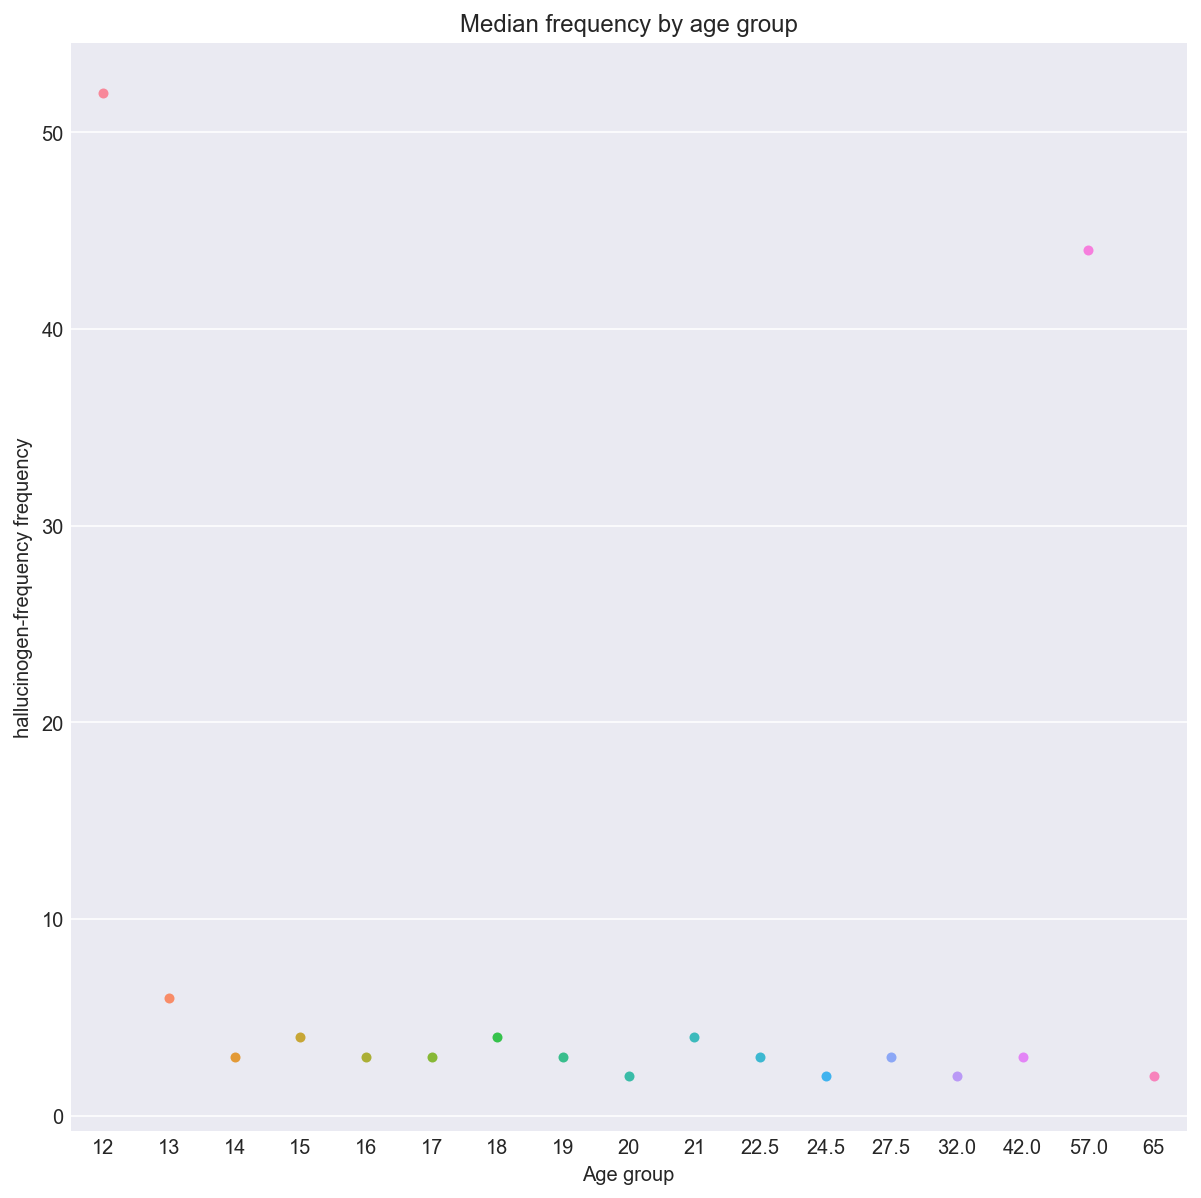

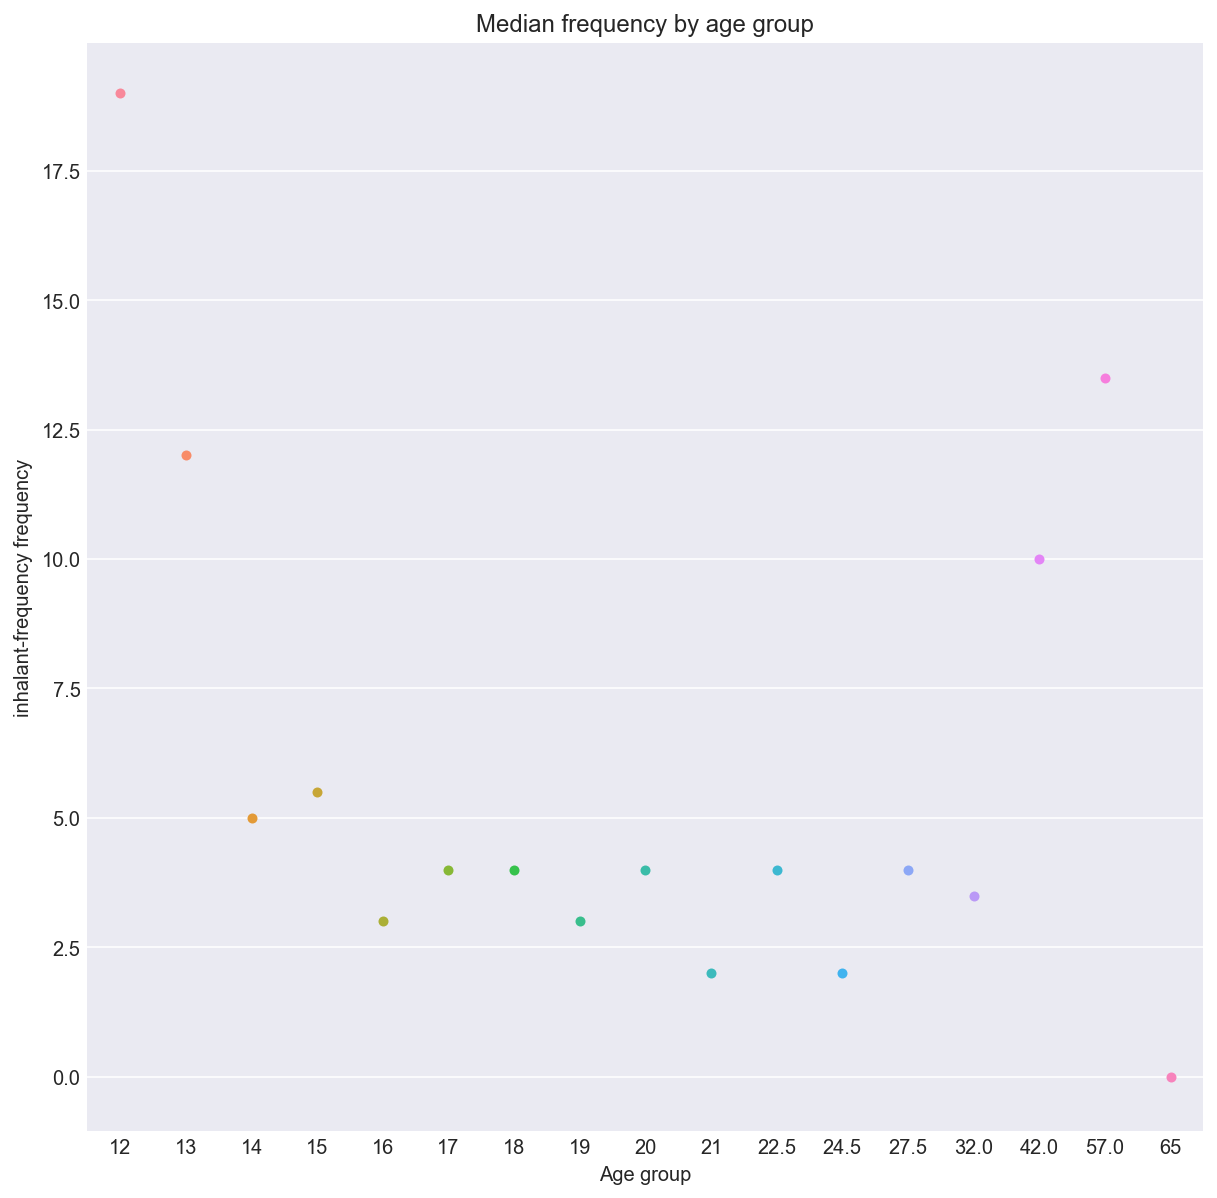

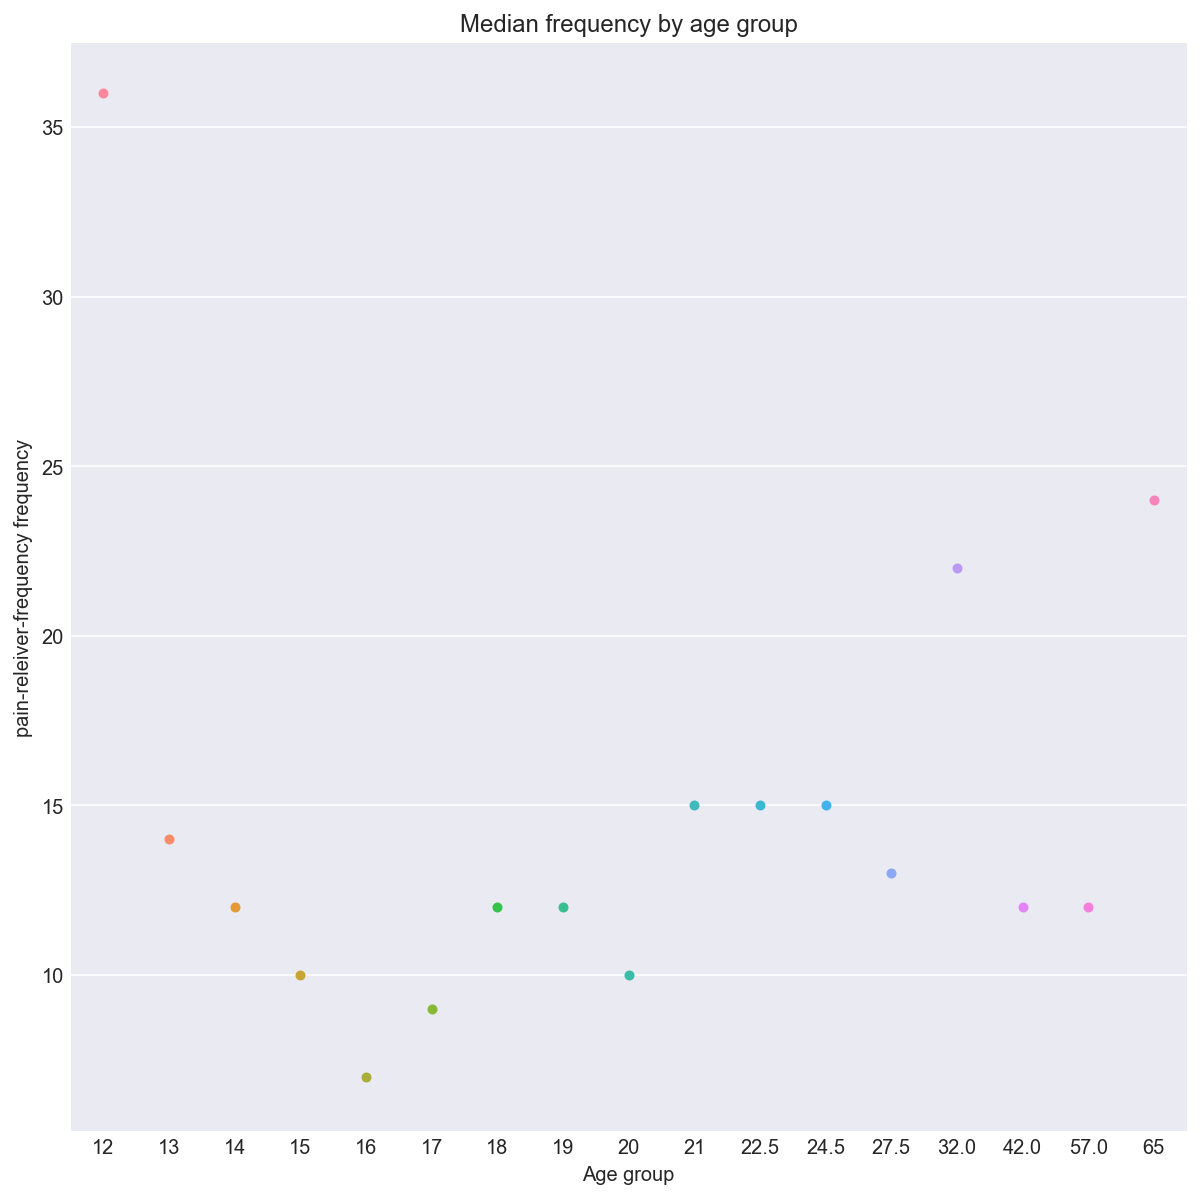

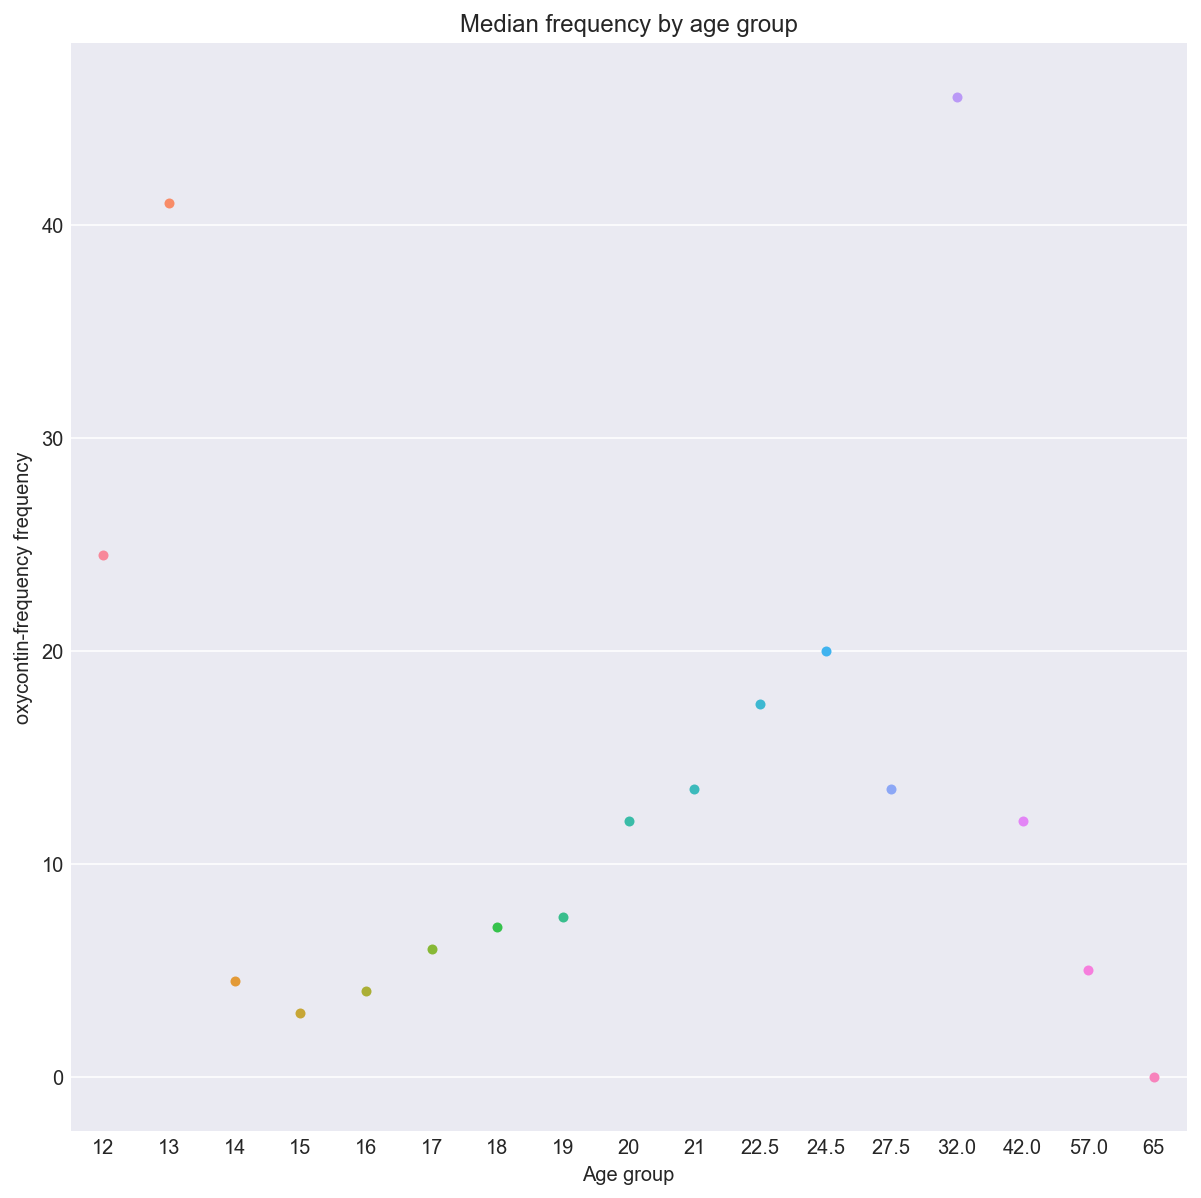

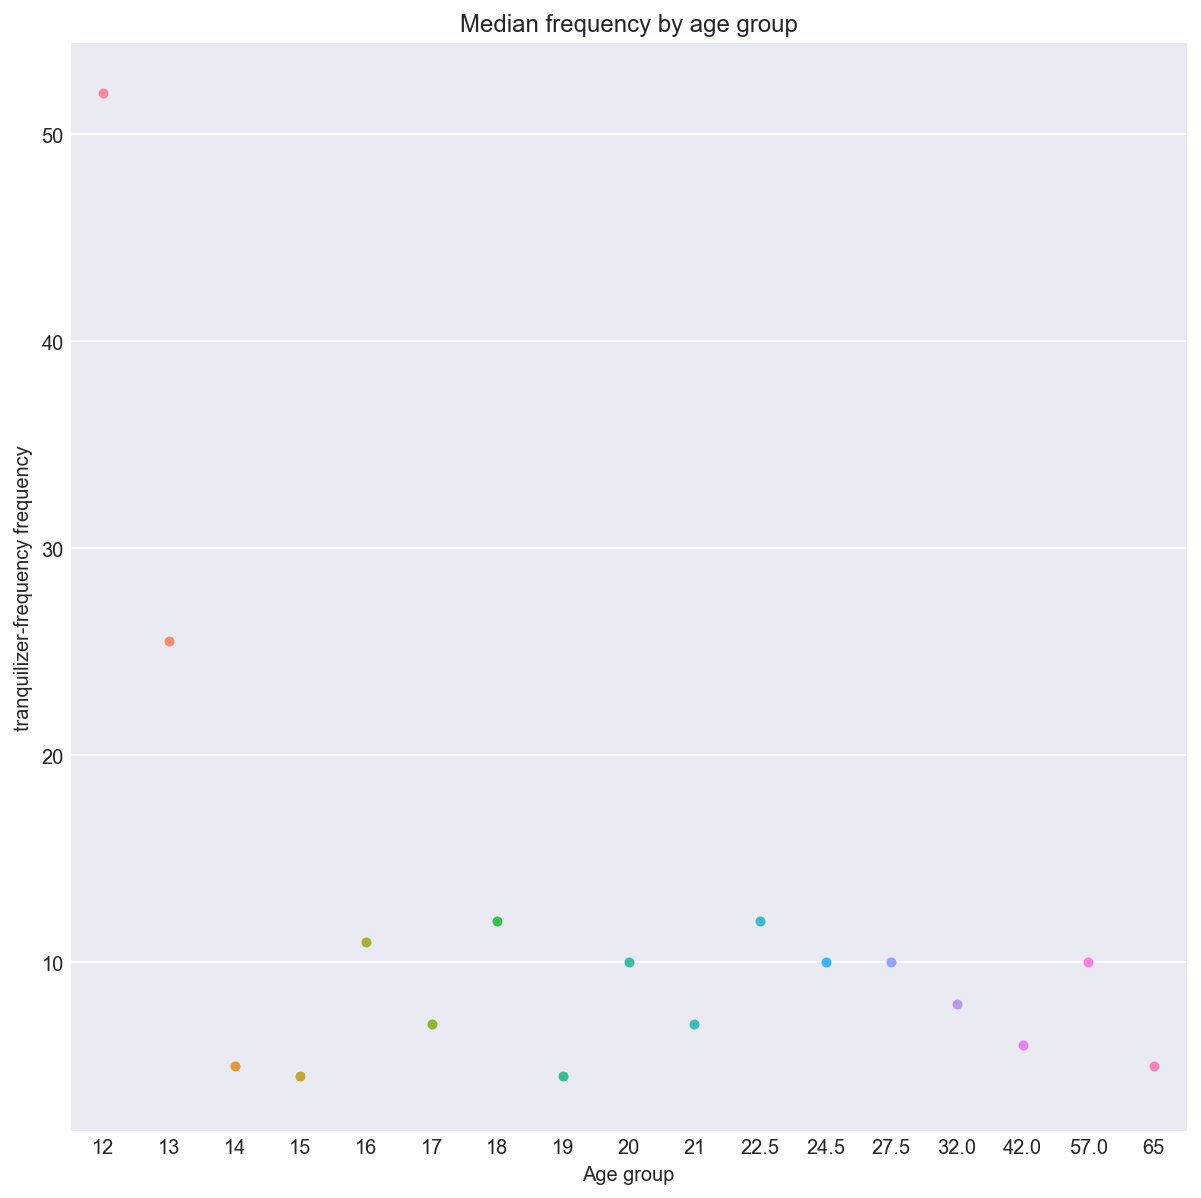

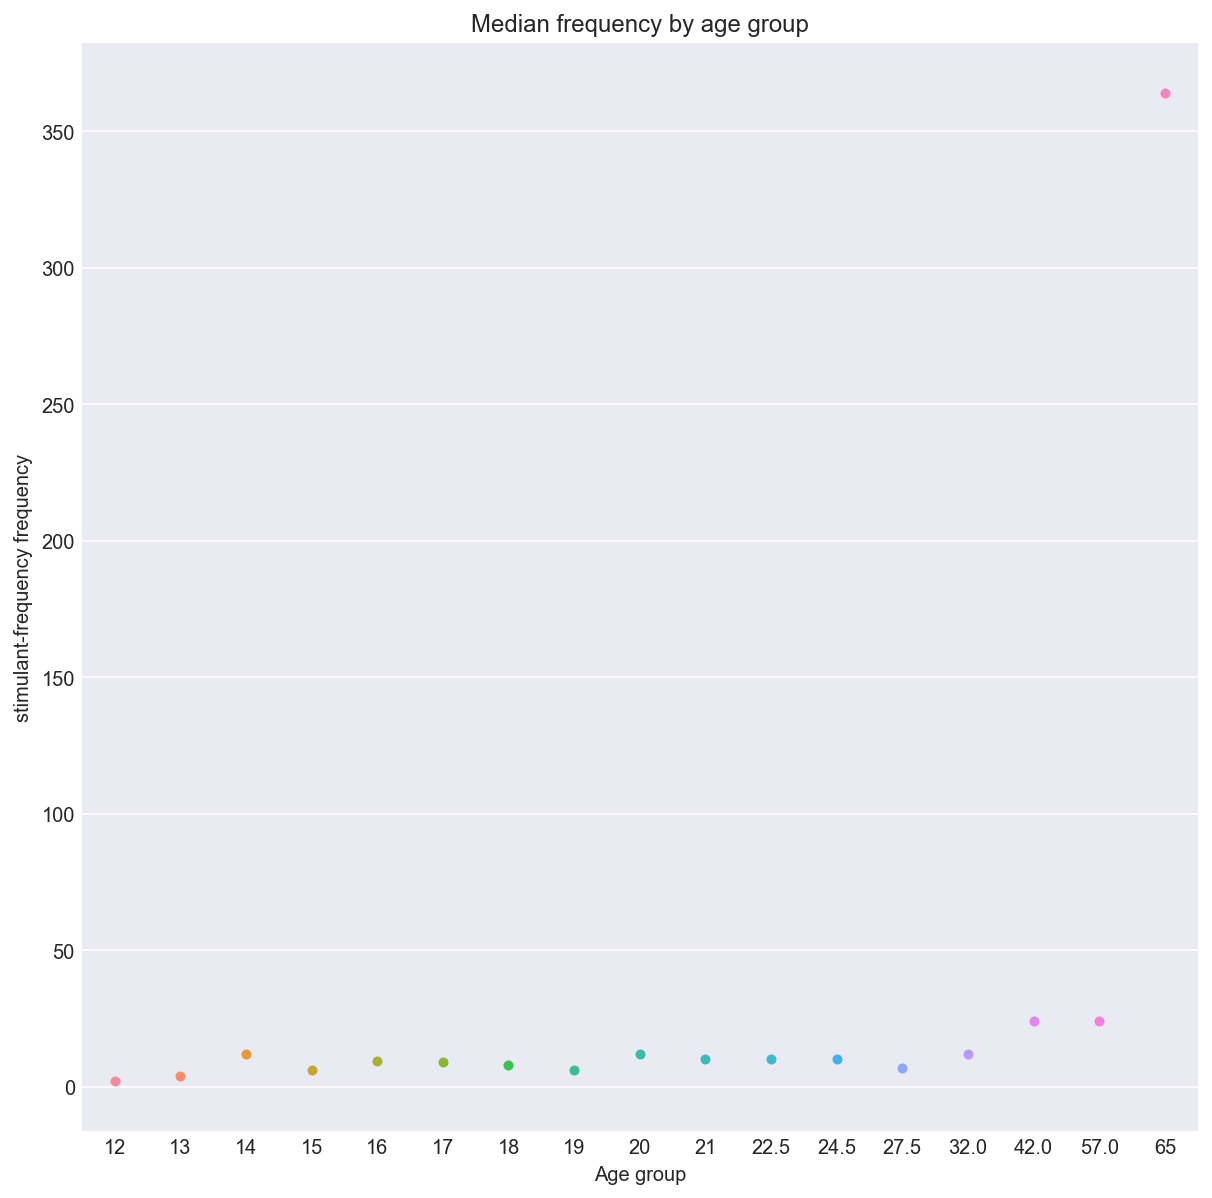

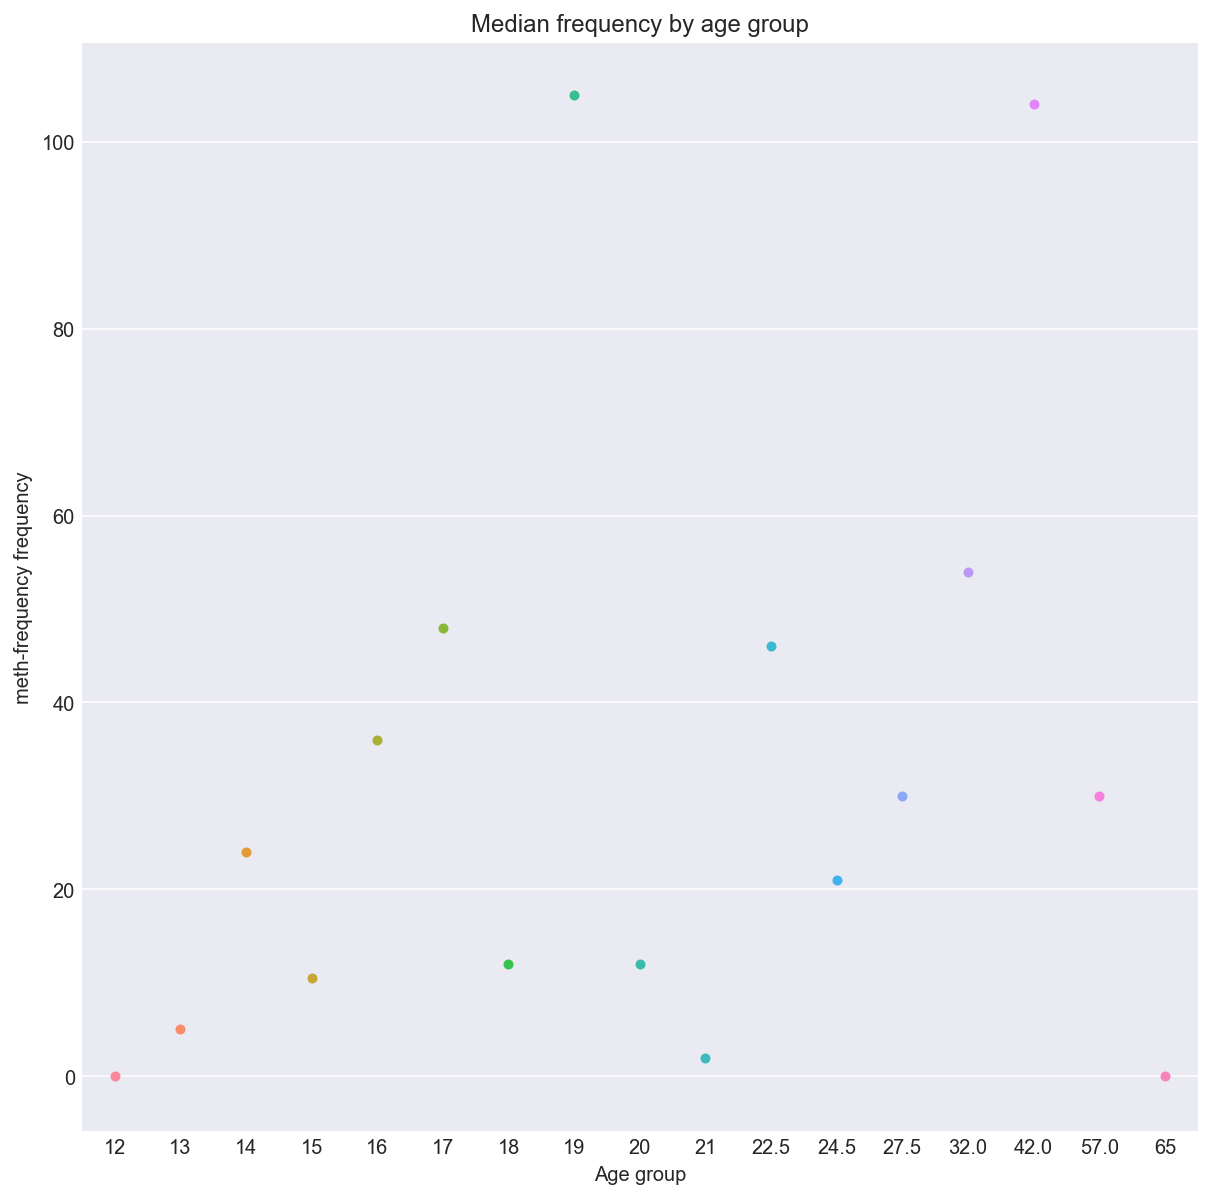

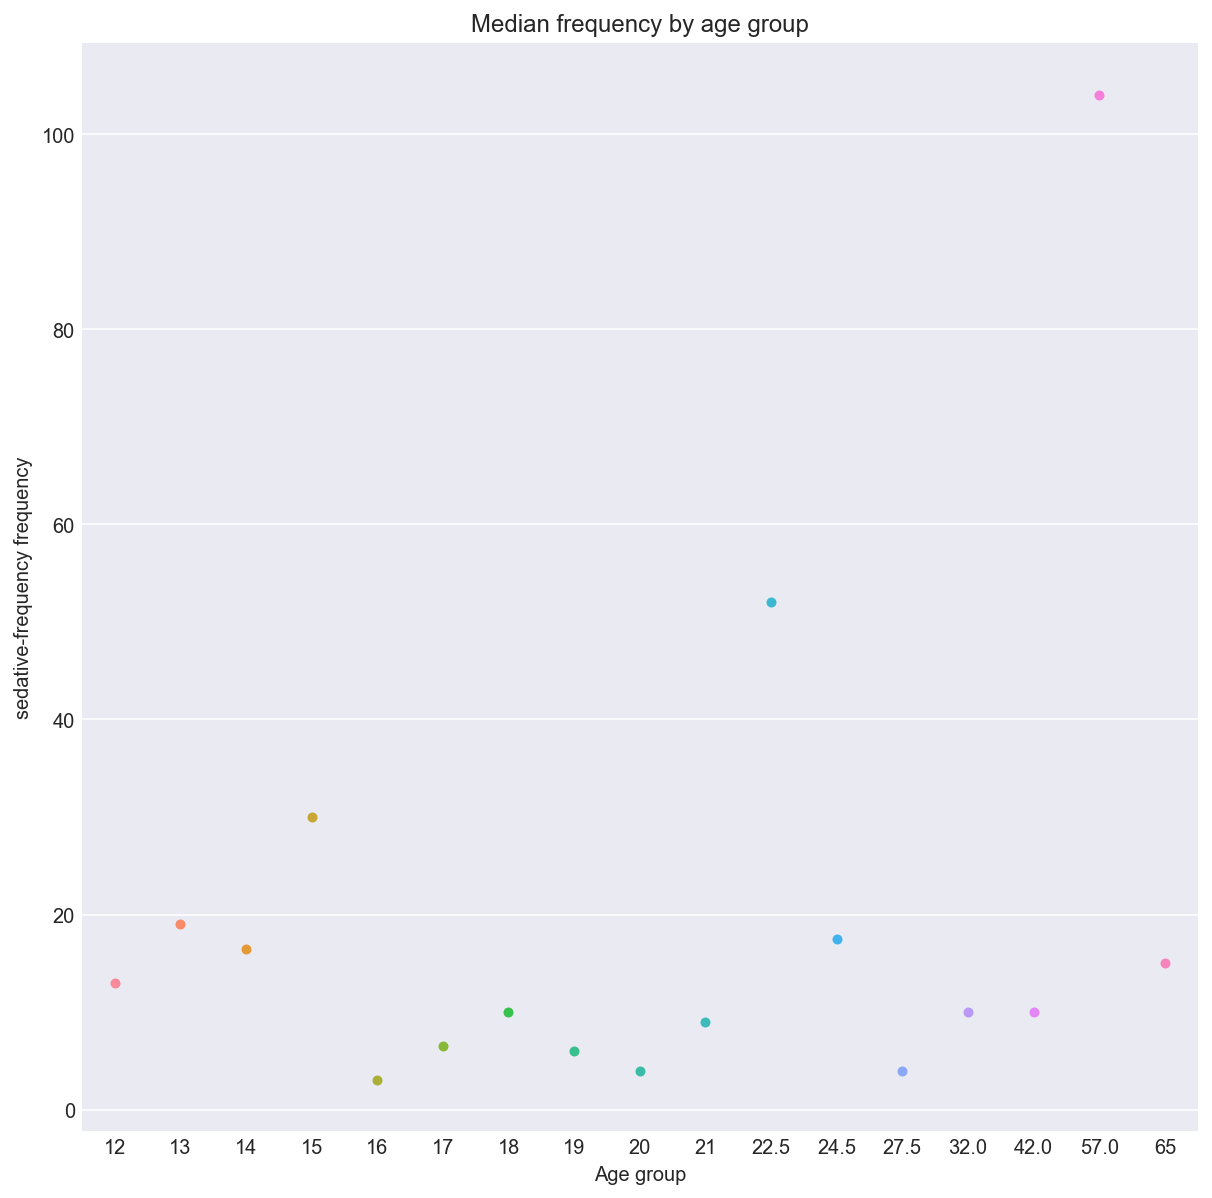

In [56]:
for drug in freq_df.columns.values:
    ax = plt.figure(figsize=(10, 10))
    ax = sns.stripplot(x=ages, y=freq_df[drug], data=freq_df[1:])
    ax.set( xlabel='Age group', ylabel=drug+ ' frequency', title='Median frequency by age group')

### Findings

From the graphs above, the top 3 drug uses are alcohol, marijuana, pain releiver.
The top 3 frequently used drugs are heroin, marijuana, alcohol.

Identified that the trend for the usage and frequency of using drugs are higher from the age group of 19 to 32 years old. The general trend is that is increases from 12 and peaks around 20-25, before decreasing.

Overall, this tells us that people in their early twenties and mid twenties are more likely to use drugs, as compared to other age groups. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

To explore the means of the different types of drugs (controlled vs not controlled)
https://www.verywellmind.com/what-are-controlled-drugs-22310

Controlled drugs are substances that are controlled under the Controlled Substances Act (CSA), and categorised based on how dangerous they are. 


List of substances:

Controlled - marijuana, cocaine, crack, heroin, hallucinogen, inhalant, pain-releiver, oxycontin, tranquilizer, stimulant, meth, sedative
       
Not controlled - alcohol

### Hypothesis


Ho  - Usage of controlled drugs mean is the same as non-controlled drugs usage

H1  - Usage of controlled drugs mean is different from non-controlled drugs usage


In [57]:
controlled = usage_df.iloc[:,1:].mean(axis=1).astype(float).tolist()
controlled

[0.746153846153846,
 1.415384615384616,
 2.884615384615385,
 4.584615384615384,
 6.315384615384616,
 7.969230769230768,
 9.60769230769231,
 10.16923076923077,
 10.884615384615385,
 11.461538461538463,
 11.18461538461538,
 10.507692307692308,
 9.73076923076923,
 8.592307692307696,
 7.3769230769230765,
 6.261538461538463,
 3.9538461538461545]

In [58]:
noncontrolled = usage_df['alcohol-use'].astype(float).tolist()
noncontrolled

[3.9,
 8.5,
 18.1,
 29.2,
 40.1,
 49.3,
 58.7,
 64.6,
 69.7,
 83.2,
 84.2,
 83.1,
 80.7,
 77.5,
 75.0,
 67.2,
 49.3]

In [59]:
observations = [controlled, noncontrolled]


In [60]:
chi2, p, dof, ex = stats.chi2_contingency(observations, correction=False)


In [61]:
chi2,p

(4.311627104331264, 0.9982533270447758)

**Report**

p>0.05

we cannot reject the null hypothesis (H0)

the samples come from the same population

we cannot say there is a statistically significant difference between the two groups

we cannot say the company is the means of usage of controlled vs controlled drugs are the different.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [62]:
sat_df = df2.copy(True)
sat_df = df2.drop(columns=['Rate'])
sat_df.head()

,State,Verbal,Math,Verbal - Math
0,CT,509,510,-1
1,NJ,499,513,-14
2,MA,511,515,-4
3,NY,495,505,-10
4,NH,520,516,4


In [63]:
sat_df.describe()

,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,0.519231
std,33.236225,36.014975,15.729939
min,482.000000,439.000000,-30.000000
25%,501.000000,504.000000,-6.000000
50%,526.500000,521.000000,0.000000
75%,562.000000,555.750000,4.250000
max,593.000000,603.000000,95.000000


In [64]:
sat_df.corr()

,Verbal,Math,Verbal - Math
Verbal,1.000000,0.899871,0.052600
Math,0.899871,1.000000,-0.388219
Verbal - Math,0.052600,-0.388219,1.000000


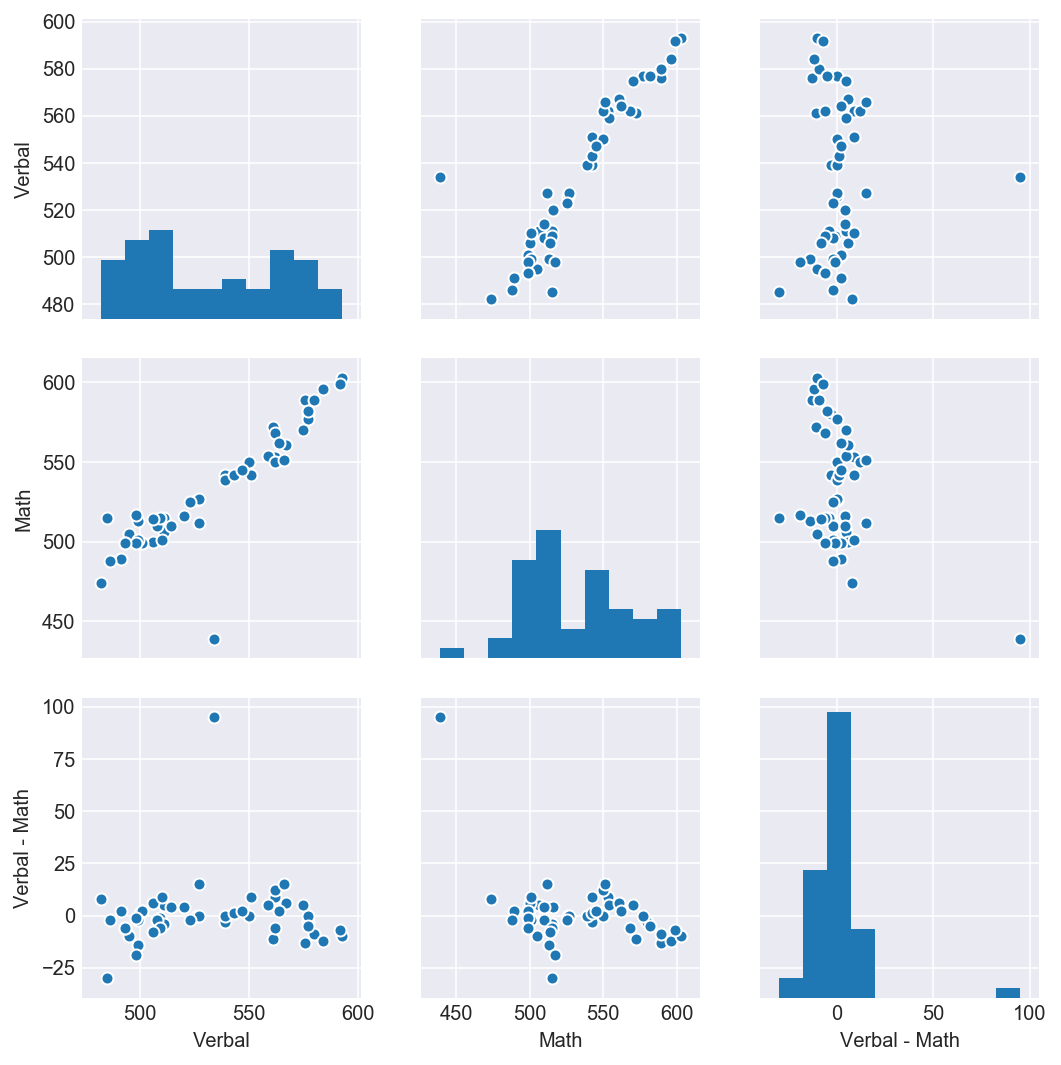

In [65]:
# check if there is outlier
sns.pairplot(sat_df)

Outliers are data points that are < or > 3 standard deviation from the mean.


In [66]:
sat_df[(np.abs(sat_df['Math']-(sat_df['Math'].mean()) > (3*sat_df['Math'].std())))]
# no outliers noted, although pairplot seems to indicate. 

,State,Verbal,Math,Verbal - Math


In [67]:
sat_df[(np.abs(sat_df['Verbal']-sat_df['Verbal'].mean()) > (3*sat_df['Verbal'].std()))]
# no outliers noted, although pairplot seems to indicate. 

,State,Verbal,Math,Verbal - Math


No outliers removed, no change in stats.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Pearson correlation coefficients measure only linear relationship between two continuous variables Spearman correlation coefficients measure only monotonic relationship between two continuous or ordinal variables The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data

So a meaningful relationship can exist even if the correlation coefficients are 0.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [68]:
df2.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [69]:
df2['Rate_percentiles'] = [stats.percentileofscore(df2['Rate'],df2['Rate'][r]) for r in range(len(df2['Rate']))]
df2.head()

,State,Rate,Verbal,Math,Verbal - Math,Rate_percentiles
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [70]:
print ("The percentile of California in Rate is " + str(df2.loc[df2['State']=='CA', 'Rate'].values[0]))


The percentile of California in Rate is 51


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [71]:
pain_releiver = drug_df['pain-releiver-frequency'].values
pain_releiver

array([36., 14., 12., 10.,  7.,  9., 12., 12., 10., 15., 15., 15., 13.,
       22., 12., 12., 24.])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


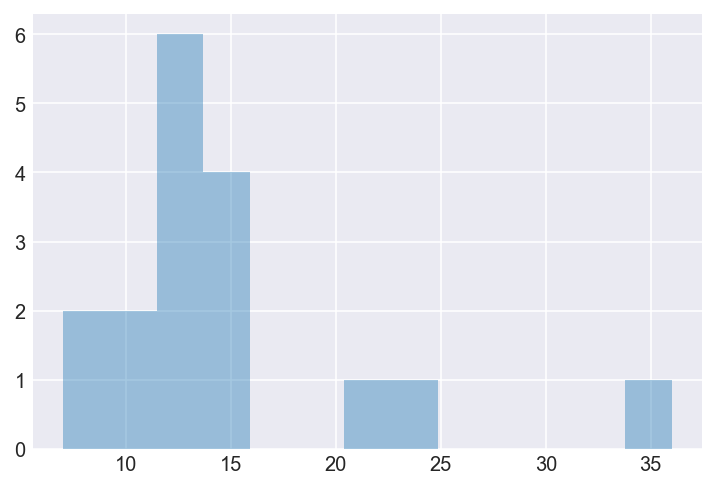

In [72]:
sns.distplot(pain_releiver, kde=False)

In [73]:
pain_releiver_percentiles = [stats.percentileofscore(pain_releiver,pain_releiver[a]) for a in range(len(pain_releiver))]
pain_releiver_percentiles

[100.0,
 64.70588235294117,
 41.1764705882353,
 20.58823529411765,
 5.882352941176471,
 11.764705882352942,
 41.1764705882353,
 41.1764705882353,
 20.58823529411765,
 76.47058823529412,
 76.47058823529412,
 76.47058823529412,
 58.8235294117647,
 88.23529411764706,
 41.1764705882353,
 41.1764705882353,
 94.11764705882354]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


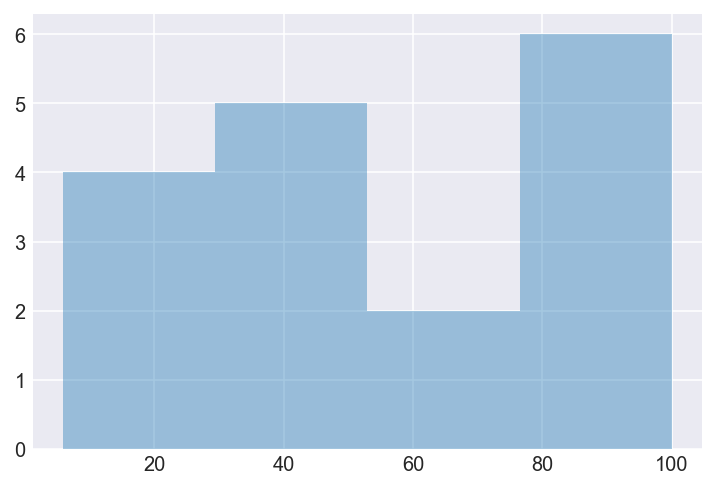

In [74]:
sns.distplot(pain_releiver_percentiles, kde=False)

The distribution becomes less skewed.